# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} + \frac{2\alpha}{N}\sum_{i=1}^N (y_{i} - (x_{i},w))x_{i}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} - \frac{\alpha}{N}\sum_{i=1}^N (y_{i} - a(x_{i}))$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$\nabla_{w}^{2}Q = 2X^{T}X$$ - матрица Гессе, докажем ее положительную определенность. По определению положительно определенной матрицы для $$X^{T}X:$$$$z^{T}X^{T}Xz = \parallel Xz\parallel > 0, \forall z \in R^n, z \neq 0$$ - Xz не может быть нулевым, так как X имеет полный ранг, и строк не меньше, чем столбцов. Получим, что матрица Гессе положительно определена в данной точке, градиент которой равен нулю. Значит эта точка является локальным минимумом.

Точное решение для модели с L2 регуляризацией:
$$ \omega = (X^{T}X + \lambda I)^{-1}X^TY$$
Если матрица X имеет линейно зависимые признаки, то и $$X^{T}X$$ имеет линейно зависимые строки, а значит  последняя не имеет обратную матрицу. В этом случае L2 регуляризация позволяет сделать строки линейно независимыми, чтобы  сделать ее эту матрицу обратимой.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{\partial}{\partial a(x_i)}E(L|x_i) = - \frac{p(y_i = 1|x_i)}{a(x_i)} + \frac{1 - p(y_i = 1|x_i)}{1 - a(x_i)} = \frac{a(x_i) - p(y_i = 1|x_i)}{a(x_i)(1 - a(x_i))} = 0$$
Отсюда
$$a(x_i) = p(y_i = 1|x_i)$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Нет. Мы используем регуляризацию, чтобы штрафовать за большую норму векторов весов(что является признаком переобучения). Если мы будем штрафовать за большую норму вектора $w_0$, то это значит, что мы предполагаем близость целевой переменной к 0, что в общем случае неправильно.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [79]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_batch = ""
    y_batch = ""
    it = np.arange(X.shape[0])
    if shuffle:
        it = np.random.permutation(it)
    n = X.shape[0]//batch_size
    if n == 0:
        n = 1
    for ind_arr in np.array_split(it, n):
        X_batch = X[ind_arr]
        y_batch = y[ind_arr]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [130]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=10):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.weights = None
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            reg_a = np.dot(X_batch, self.weights)
            loss = np.mean((y_batch - reg_a) ** 2)
        elif self.model_type == 'log_reg':
            log_a = sigmoid(np.dot(X_batch, self.weights)) 
            loss = - np.mean(y_batch * np.log(log_a) + (1 - y_batch) * np.log(1 - log_a))
        loss += 1 / self.C * np.linalg.norm(self.weights)
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = X_batch.shape[0]
        
        if(self.model_type == 'lin_reg'):
            reg_a = np.dot(X_batch, self.weights)
            tmp = reg_a - y_batch
            loss_grad = 2 * np.dot(tmp, X_batch)
        elif(self.model_type == 'log_reg'):
            log_a = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = np.dot((log_a - y_batch), X_batch)
        loss_grad = loss_grad / N + 2.0 / self.C * (self.weights)
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        y_hat = np.dot(X, self.weights)
        if(self.model_type == 'log_reg'):
            y_hat = sigmoid(y_hat)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return roc_auc_score(y, y_pred)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf):
    x = range(-2, 2)
    plt.plot(x,-(clf.weights[0] * x) / clf.weights[1])
    pass

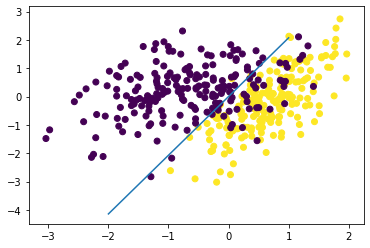

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
scaler = StandardScaler()
X = scaler.fit_transform(X)
model1 = MySGDClassifier(batch_generator, C=100, alpha=0.01, 
                        max_epoch=100, model_type='log_reg', batch_size=10)
model1.fit(X, y)
plot_decision_boundary(model1)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [57]:
from sklearn.datasets import make_classification

In [58]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

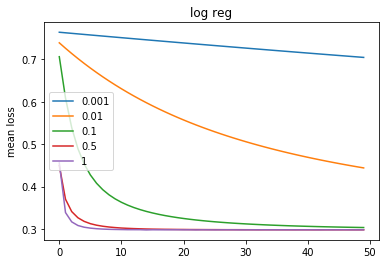

In [160]:
for alpha in [0.001, 0.01, 0.1, 0.5, 1]:
    clf = MySGDClassifier(batch_generator, C=1000, alpha=alpha, 
                        max_epoch=250, model_type='log_reg', batch_size=200)
    clf.fit(X, y)
    N = 10
    loss = np.asarray(clf.errors_log["loss"]).reshape(-1, N)
    plt.plot(loss.mean(axis=1), label=alpha)

plt.title("log reg")
plt.ylabel("mean loss")
plt.legend()
plt.show()

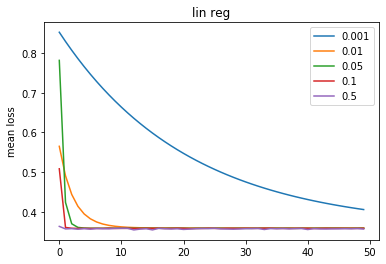

In [159]:
for alpha in [0.001, 0.01, 0.05, 0.1, 0.5]:
    clf = MySGDClassifier(batch_generator, C=1000, alpha=alpha, 
                        max_epoch=250, model_type='lin_reg', batch_size=200)
    clf.fit(X, y)
    N = 10
    loss = np.asarray(clf.errors_log["loss"]).reshape(-1, N)
    plt.plot(loss.mean(axis=1), label=alpha)

plt.title("lin reg")
plt.ylabel("mean loss")
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

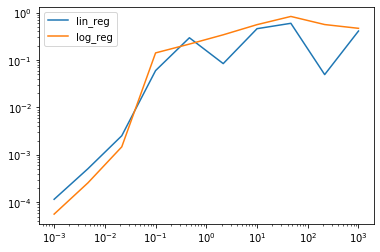

In [187]:
lin_c = []
log_c = []

C_arr = np.logspace(3, -3, 10)
for C in C_arr:
    clf = MySGDClassifier(batch_generator, C=C, alpha=0.0001, 
                        max_epoch=200, model_type='lin_reg', batch_size=100)
    clf.fit(X, y)
    lin_c.append(np.mean(clf.weights))
    clf = MySGDClassifier(batch_generator, C=C, alpha=0.0001, 
                        max_epoch=200, model_type='log_reg', batch_size=100)
    clf.fit(X, y)
    log_c.append(np.mean(clf.weights))

plt.xscale("log")
plt.yscale("log")
plt.plot(C_arr, lin_c, label = 'lin_reg')
plt.plot(C_arr, log_c, label = 'log_reg')
plt.legend()
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [8]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [9]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [45]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [129]:
groups_train

array([  1,   1,   1, ..., 129, 129, 129])

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [133]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

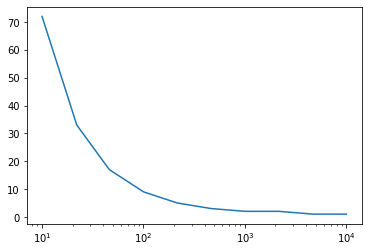

In [75]:
import time
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
fit_time = []
batch_size = [round(x) for x in np.logspace(1, 4, 10)]
for size in batch_size:
    cur_time = time.time();
    clf = MySGDClassifier(batch_generator, C=100, alpha=0.01, 
                        max_epoch=200, model_type='lin_reg', batch_size=size)
    clf.fit(X_train, y_train)
    fit_time.append(round(time.time() - cur_time))
plt.xscale("log")
plt.plot(batch_size, fit_time)
plt.show()

In [144]:
from itertools import product
from tqdm import tqdm
res = {}
res["score"] = 0
seq = product(
     ("lin_reg", "log_reg"),
    np.logspace(-4, -1, 10),
    np.logspace(0, 4, 10),
    np.linspace(50, 100, 10)
)
for model_type, alpha, C, max_epoch in tqdm(list(seq)):
    clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, 
                        max_epoch=int(max_epoch), model_type=model_type, batch_size=11690)
    score = cross_val_score(clf, X_train, y_train, cv = 3, groups=groups_train).mean()
    print(score)
    if res["score"] < score:
        res["score"] = score
        res["model"] = clf










  0%|          | 0/2000 [00:00<?, ?it/s]








  0%|          | 1/2000 [00:00<22:56,  1.45it/s]

0.8006335119822792











  0%|          | 2/2000 [00:01<23:51,  1.40it/s]

0.8002060665950431











  0%|          | 3/2000 [00:02<25:46,  1.29it/s]

0.8021057733733109











  0%|          | 4/2000 [00:03<28:08,  1.18it/s]

0.8015934887336237











  0%|          | 5/2000 [00:04<29:50,  1.11it/s]

0.8024260791621646











  0%|          | 6/2000 [00:05<30:59,  1.07it/s]

0.8016227008637397











  0%|          | 7/2000 [00:06<32:53,  1.01it/s]

0.8009605282378619











  0%|          | 8/2000 [00:07<35:34,  1.07s/it]

0.8001373081476088











  0%|          | 9/2000 [00:09<40:30,  1.22s/it]

0.8015693735575802











  0%|          | 10/2000 [00:10<42:57,  1.30s/it]

0.8012274181687719











  1%|          | 11/2000 [00:11<37:59,  1.15s/it]

0.8005821568419799











  1%|          | 12/2000 [00:12<34:41,  1.05s/it]

0.7999775369843816











  1%|          | 13/2000 [00:13<32:53,  1.01it/s]

0.8005811943899754











  1%|          | 14/2000 [00:14<32:30,  1.02it/s]

0.8005105687774327











  1%|          | 15/2000 [00:15<33:09,  1.00s/it]

0.8016057932238065











  1%|          | 16/2000 [00:16<34:57,  1.06s/it]

0.7997634159489883











  1%|          | 17/2000 [00:17<34:39,  1.05s/it]

0.7992590770963762











  1%|          | 18/2000 [00:18<36:03,  1.09s/it]

0.8018759739305571











  1%|          | 19/2000 [00:20<39:30,  1.20s/it]

0.8016188485217843











  1%|          | 20/2000 [00:21<41:40,  1.26s/it]

0.8025553305939214











  1%|          | 21/2000 [00:22<36:48,  1.12s/it]

0.8024326818215107











  1%|          | 22/2000 [00:23<33:01,  1.00s/it]

0.802141078415162











  1%|          | 23/2000 [00:23<31:06,  1.06it/s]

0.7981219325455425











  1%|          | 24/2000 [00:24<30:32,  1.08it/s]

0.8010000853597165











  1%|▏         | 25/2000 [00:25<31:39,  1.04it/s]

0.8009742739526683











  1%|▏         | 26/2000 [00:26<32:02,  1.03it/s]

0.8012102143152142











  1%|▏         | 27/2000 [00:27<32:47,  1.00it/s]

0.8003777883356378











  1%|▏         | 28/2000 [00:29<33:53,  1.03s/it]

0.8011380334056986











  1%|▏         | 29/2000 [00:30<35:10,  1.07s/it]

0.8021379989829408











  2%|▏         | 30/2000 [00:31<37:00,  1.13s/it]

0.8004205578140281











  2%|▏         | 31/2000 [00:32<32:28,  1.01it/s]

0.8004721673690683











  2%|▏         | 32/2000 [00:32<29:49,  1.10it/s]

0.8010790051179514











  2%|▏         | 33/2000 [00:33<28:46,  1.14it/s]

0.8008372416133319











  2%|▏         | 34/2000 [00:34<28:33,  1.15it/s]

0.8007311702729755











  2%|▏         | 35/2000 [00:35<29:03,  1.13it/s]

0.8002163519925439











  2%|▏         | 36/2000 [00:36<29:54,  1.09it/s]

0.8006560702905192











  2%|▏         | 37/2000 [00:37<31:11,  1.05it/s]

0.8005666535775341











  2%|▏         | 38/2000 [00:38<32:49,  1.00s/it]

0.8017996215559794











  2%|▏         | 39/2000 [00:39<34:30,  1.06s/it]

0.8004716513016975











  2%|▏         | 40/2000 [00:40<36:32,  1.12s/it]

0.8004604878391453











  2%|▏         | 41/2000 [00:41<32:16,  1.01it/s]

0.800091559788411











  2%|▏         | 42/2000 [00:42<29:55,  1.09it/s]

0.7995432276083867











  2%|▏         | 43/2000 [00:43<28:39,  1.14it/s]

0.8012784234783968











  2%|▏         | 44/2000 [00:44<28:23,  1.15it/s]

0.8005442145243752











  2%|▏         | 45/2000 [00:45<29:24,  1.11it/s]

0.8001438778187883











  2%|▏         | 46/2000 [00:46<30:12,  1.08it/s]

0.8012430664999141











  2%|▏         | 47/2000 [00:47<31:24,  1.04it/s]

0.8001950006495574











  2%|▏         | 48/2000 [00:48<32:41,  1.00s/it]

0.8010911134218887











  2%|▏         | 49/2000 [00:49<34:15,  1.05s/it]

0.800930104187476











  2%|▎         | 50/2000 [00:50<39:06,  1.20s/it]

0.8007876789176978











  3%|▎         | 51/2000 [00:51<35:31,  1.09s/it]

0.801250057690137











  3%|▎         | 52/2000 [00:52<32:28,  1.00s/it]

0.8007654398001695











  3%|▎         | 53/2000 [00:53<30:28,  1.06it/s]

0.8012475509078039











  3%|▎         | 54/2000 [00:54<29:35,  1.10it/s]

0.8018198272277228











  3%|▎         | 55/2000 [00:55<29:36,  1.09it/s]

0.8007116568927529











  3%|▎         | 56/2000 [00:56<30:29,  1.06it/s]

0.8010085412894954











  3%|▎         | 57/2000 [00:57<32:25,  1.00s/it]

0.7998504997148785











  3%|▎         | 58/2000 [00:58<33:49,  1.05s/it]

0.800808870097951











  3%|▎         | 59/2000 [00:59<34:49,  1.08s/it]

0.8023602233547869











  3%|▎         | 60/2000 [01:00<36:42,  1.14s/it]

0.8003512128574685











  3%|▎         | 61/2000 [01:01<33:20,  1.03s/it]

0.8007261823062946











  3%|▎         | 62/2000 [01:02<31:47,  1.02it/s]

0.8011851262035741











  3%|▎         | 63/2000 [01:03<31:53,  1.01it/s]

0.7999892951022609











  3%|▎         | 64/2000 [01:04<32:16,  1.00s/it]

0.8004666161312307











  3%|▎         | 65/2000 [01:05<33:03,  1.02s/it]

0.7996184860314516











  3%|▎         | 66/2000 [01:06<33:55,  1.05s/it]

0.8016521302631413











  3%|▎         | 67/2000 [01:07<35:11,  1.09s/it]

0.8014021639197239











  3%|▎         | 68/2000 [01:09<36:14,  1.13s/it]

0.7999359177200763











  3%|▎         | 69/2000 [01:10<38:07,  1.18s/it]

0.8016445603277141











  4%|▎         | 70/2000 [01:11<40:04,  1.25s/it]

0.801815660593281











  4%|▎         | 71/2000 [01:12<34:33,  1.07s/it]

0.8014063859481334











  4%|▎         | 72/2000 [01:13<33:53,  1.05s/it]

0.8013735413974135











  4%|▎         | 73/2000 [01:14<34:40,  1.08s/it]

0.8022578429942887











  4%|▎         | 74/2000 [01:15<32:03,  1.00it/s]

0.8010986544975432











  4%|▍         | 75/2000 [01:16<30:43,  1.04it/s]

0.8018044671155721











  4%|▍         | 76/2000 [01:17<30:17,  1.06it/s]

0.7990633560119234











  4%|▍         | 77/2000 [01:18<30:39,  1.05it/s]

0.8020894864503871











  4%|▍         | 78/2000 [01:19<31:31,  1.02it/s]

0.7997489514396339











  4%|▍         | 79/2000 [01:20<32:42,  1.02s/it]

0.8010728234686986











  4%|▍         | 80/2000 [01:21<34:15,  1.07s/it]

0.8009190724948527











  4%|▍         | 81/2000 [01:22<29:49,  1.07it/s]

0.801385903480472











  4%|▍         | 82/2000 [01:22<27:15,  1.17it/s]

0.8002942970543477











  4%|▍         | 83/2000 [01:23<26:06,  1.22it/s]

0.8013577436490099











  4%|▍         | 84/2000 [01:24<26:02,  1.23it/s]

0.8009746334035995











  4%|▍         | 85/2000 [01:25<26:25,  1.21it/s]

0.801829505412068











  4%|▍         | 86/2000 [01:26<27:16,  1.17it/s]

0.8015848591490707











  4%|▍         | 87/2000 [01:27<28:30,  1.12it/s]

0.8010506460370016











  4%|▍         | 88/2000 [01:28<29:54,  1.07it/s]

0.8015271984670927











  4%|▍         | 89/2000 [01:29<31:33,  1.01it/s]

0.8010943015064719











  4%|▍         | 90/2000 [01:30<33:30,  1.05s/it]

0.7991410389068777











  5%|▍         | 91/2000 [01:31<29:20,  1.08it/s]

0.8010334790411212











  5%|▍         | 92/2000 [01:31<26:57,  1.18it/s]

0.8010169296635695











  5%|▍         | 93/2000 [01:32<25:50,  1.23it/s]

0.8012476539866119











  5%|▍         | 94/2000 [01:33<25:39,  1.24it/s]

0.8010781035186123











  5%|▍         | 95/2000 [01:34<26:06,  1.22it/s]

0.799987166461715











  5%|▍         | 96/2000 [01:35<27:00,  1.18it/s]

0.8001463798800884











  5%|▍         | 97/2000 [01:36<28:11,  1.13it/s]

0.8007203714805237











  5%|▍         | 98/2000 [01:37<29:37,  1.07it/s]

0.8021684503846047











  5%|▍         | 99/2000 [01:38<31:13,  1.01it/s]

0.8018273295752785











  5%|▌         | 100/2000 [01:39<33:15,  1.05s/it]

0.8007264337480259











  5%|▌         | 101/2000 [01:40<31:27,  1.01it/s]

0.8021007126284844











  5%|▌         | 102/2000 [01:41<32:36,  1.03s/it]

0.7995333338178163











  5%|▌         | 103/2000 [01:42<32:12,  1.02s/it]

0.8010815143600736











  5%|▌         | 104/2000 [01:43<31:20,  1.01it/s]

0.8003520418837504











  5%|▌         | 105/2000 [01:44<30:06,  1.05it/s]

0.8009843768019888











  5%|▌         | 106/2000 [01:45<29:48,  1.06it/s]

0.7985474808201182











  5%|▌         | 107/2000 [01:46<30:14,  1.04it/s]

0.8007593468379115











  5%|▌         | 108/2000 [01:47<31:21,  1.01it/s]

0.8001778585665186











  5%|▌         | 109/2000 [01:48<32:23,  1.03s/it]

0.8005748450631365











  6%|▌         | 110/2000 [01:49<33:59,  1.08s/it]

0.8010578075503333











  6%|▌         | 111/2000 [01:50<29:36,  1.06it/s]

0.8018899756899994











  6%|▌         | 112/2000 [01:50<27:14,  1.15it/s]

0.8008934138560863











  6%|▌         | 113/2000 [01:51<27:58,  1.12it/s]

0.7995091646479868











  6%|▌         | 114/2000 [01:52<28:52,  1.09it/s]

0.8001976339386708











  6%|▌         | 115/2000 [01:53<30:04,  1.04it/s]

0.8001287922724792











  6%|▌         | 116/2000 [01:54<31:13,  1.01it/s]

0.8016356928138246











  6%|▌         | 117/2000 [01:56<33:04,  1.05s/it]

0.7982150728002919











  6%|▌         | 118/2000 [01:57<33:39,  1.07s/it]

0.8003050174038688











  6%|▌         | 119/2000 [01:58<34:47,  1.11s/it]

0.8007919429694343











  6%|▌         | 120/2000 [01:59<36:09,  1.15s/it]

0.8018869760943472











  6%|▌         | 121/2000 [02:00<31:47,  1.02s/it]

0.8007341870841543











  6%|▌         | 122/2000 [02:01<29:15,  1.07it/s]

0.8010583991519583











  6%|▌         | 123/2000 [02:01<28:07,  1.11it/s]

0.7998521499939814











  6%|▌         | 124/2000 [02:02<27:52,  1.12it/s]

0.7999640387171238











  6%|▋         | 125/2000 [02:03<28:16,  1.11it/s]

0.8009359500037742











  6%|▋         | 126/2000 [02:04<29:03,  1.07it/s]

0.8008687709008212











  6%|▋         | 127/2000 [02:05<30:09,  1.04it/s]

0.802049359758969











  6%|▋         | 128/2000 [02:06<31:34,  1.01s/it]

0.7995087940187794











  6%|▋         | 129/2000 [02:07<33:07,  1.06s/it]

0.8013260339574547











  6%|▋         | 130/2000 [02:09<34:52,  1.12s/it]

0.800695679517657











  7%|▋         | 131/2000 [02:09<30:58,  1.01it/s]

0.8020642077775774











  7%|▋         | 132/2000 [02:10<28:33,  1.09it/s]

0.8006748318246922











  7%|▋         | 133/2000 [02:11<27:29,  1.13it/s]

0.8010709520915075











  7%|▋         | 134/2000 [02:12<27:07,  1.15it/s]

0.8009125489173291











  7%|▋         | 135/2000 [02:13<28:02,  1.11it/s]

0.8006138342003434











  7%|▋         | 136/2000 [02:14<29:28,  1.05it/s]

0.8004353661703253











  7%|▋         | 137/2000 [02:15<32:16,  1.04s/it]

0.8005002003780758











  7%|▋         | 138/2000 [02:16<34:16,  1.10s/it]

0.8016543290222247











  7%|▋         | 139/2000 [02:18<36:17,  1.17s/it]

0.7999469685544405











  7%|▋         | 140/2000 [02:19<38:09,  1.23s/it]

0.8008427058531337











  7%|▋         | 141/2000 [02:20<33:20,  1.08s/it]

0.8008747626363367











  7%|▋         | 142/2000 [02:21<30:39,  1.01it/s]

0.800426181794573











  7%|▋         | 143/2000 [02:21<29:27,  1.05it/s]

0.8024479570721975











  7%|▋         | 144/2000 [02:22<28:50,  1.07it/s]

0.8010474790439992











  7%|▋         | 145/2000 [02:23<28:59,  1.07it/s]

0.8014278741075719











  7%|▋         | 146/2000 [02:24<29:29,  1.05it/s]

0.8018830763317042











  7%|▋         | 147/2000 [02:25<30:27,  1.01it/s]

0.7999851251253398











  7%|▋         | 148/2000 [02:26<31:38,  1.03s/it]

0.8008986008983342











  7%|▋         | 149/2000 [02:28<33:18,  1.08s/it]

0.7984702166044105











  8%|▊         | 150/2000 [02:29<35:22,  1.15s/it]

0.7980150412912094











  8%|▊         | 151/2000 [02:30<31:38,  1.03s/it]

0.8005806087022035











  8%|▊         | 152/2000 [02:30<29:16,  1.05it/s]

0.7999976591968405











  8%|▊         | 153/2000 [02:31<29:04,  1.06it/s]

0.8010734717227193











  8%|▊         | 154/2000 [02:32<28:45,  1.07it/s]

0.799190977916858











  8%|▊         | 155/2000 [02:33<29:03,  1.06it/s]

0.8024322978420165











  8%|▊         | 156/2000 [02:34<31:25,  1.02s/it]

0.8008468940752952











  8%|▊         | 157/2000 [02:36<32:35,  1.06s/it]

0.8009199618326829











  8%|▊         | 158/2000 [02:37<32:53,  1.07s/it]

0.8010805314960875











  8%|▊         | 159/2000 [02:38<34:08,  1.11s/it]

0.7987542990635785











  8%|▊         | 160/2000 [02:39<35:45,  1.17s/it]

0.8010503958353419











  8%|▊         | 161/2000 [02:40<31:28,  1.03s/it]

0.801996730360865











  8%|▊         | 162/2000 [02:41<28:54,  1.06it/s]

0.8003568918487014











  8%|▊         | 163/2000 [02:41<27:38,  1.11it/s]

0.7993279633132894











  8%|▊         | 164/2000 [02:42<27:16,  1.12it/s]

0.8013244253709196











  8%|▊         | 165/2000 [02:43<27:37,  1.11it/s]

0.8011628006301256











  8%|▊         | 166/2000 [02:44<28:23,  1.08it/s]

0.7986910775868403











  8%|▊         | 167/2000 [02:45<29:36,  1.03it/s]

0.8011741003164911











  8%|▊         | 168/2000 [02:46<30:58,  1.01s/it]

0.8018979139021588











  8%|▊         | 169/2000 [02:48<33:06,  1.08s/it]

0.8010098604566765











  8%|▊         | 170/2000 [02:49<34:46,  1.14s/it]

0.7995271357261396











  9%|▊         | 171/2000 [02:50<30:39,  1.01s/it]

0.8001018491016753











  9%|▊         | 172/2000 [02:50<28:43,  1.06it/s]

0.7997230860568806











  9%|▊         | 173/2000 [02:51<29:12,  1.04it/s]

0.7994014095786618











  9%|▊         | 174/2000 [02:52<27:58,  1.09it/s]

0.8019061645869061











  9%|▉         | 175/2000 [02:53<27:51,  1.09it/s]

0.8014511945446356











  9%|▉         | 176/2000 [02:54<28:14,  1.08it/s]

0.8014261265174897











  9%|▉         | 177/2000 [02:55<29:13,  1.04it/s]

0.800350361889082











  9%|▉         | 178/2000 [02:56<30:16,  1.00it/s]

0.7997558630981483











  9%|▉         | 179/2000 [02:57<31:34,  1.04s/it]

0.7982641988024265











  9%|▉         | 180/2000 [02:59<33:40,  1.11s/it]

0.800744775835394











  9%|▉         | 181/2000 [02:59<29:30,  1.03it/s]

0.8014312491607786











  9%|▉         | 182/2000 [03:00<27:13,  1.11it/s]

0.8006410815741355











  9%|▉         | 183/2000 [03:01<26:12,  1.16it/s]

0.7989698991765458











  9%|▉         | 184/2000 [03:02<25:55,  1.17it/s]

0.8011620716945572











  9%|▉         | 185/2000 [03:03<27:06,  1.12it/s]

0.8007013518176631











  9%|▉         | 186/2000 [03:04<28:55,  1.05it/s]

0.8012071495077908











  9%|▉         | 187/2000 [03:05<29:36,  1.02it/s]

0.7995972919372526











  9%|▉         | 188/2000 [03:06<30:38,  1.01s/it]

0.7993067317996667











  9%|▉         | 189/2000 [03:07<31:56,  1.06s/it]

0.8009456005480641











 10%|▉         | 190/2000 [03:08<33:34,  1.11s/it]

0.7992852563936056











 10%|▉         | 191/2000 [03:09<29:22,  1.03it/s]

0.8016070807127708











 10%|▉         | 192/2000 [03:10<27:02,  1.11it/s]

0.7997758254474651











 10%|▉         | 193/2000 [03:10<26:05,  1.15it/s]

0.8013923667572617











 10%|▉         | 194/2000 [03:11<26:20,  1.14it/s]

0.8005135211305884











 10%|▉         | 195/2000 [03:12<27:09,  1.11it/s]

0.8009593880702948











 10%|▉         | 196/2000 [03:13<28:14,  1.06it/s]

0.7997112902717834











 10%|▉         | 197/2000 [03:15<30:19,  1.01s/it]

0.8025514532886014











 10%|▉         | 198/2000 [03:16<31:03,  1.03s/it]

0.8001205082238281











 10%|▉         | 199/2000 [03:17<33:28,  1.12s/it]

0.7994673084207239











 10%|█         | 200/2000 [03:18<35:54,  1.20s/it]

0.8011280968370542











 10%|█         | 201/2000 [03:19<32:29,  1.08s/it]

0.8025772546018807











 10%|█         | 202/2000 [03:20<29:24,  1.02it/s]

0.7986518429099426











 10%|█         | 203/2000 [03:21<28:06,  1.07it/s]

0.8019861969766957











 10%|█         | 204/2000 [03:22<27:20,  1.09it/s]

0.8006391371943545











 10%|█         | 205/2000 [03:22<27:06,  1.10it/s]

0.7982905167251922











 10%|█         | 206/2000 [03:24<29:21,  1.02it/s]

0.7971533770542273











 10%|█         | 207/2000 [03:25<30:50,  1.03s/it]

0.7932443912266995











 10%|█         | 208/2000 [03:26<31:05,  1.04s/it]

0.8002916400924643











 10%|█         | 209/2000 [03:27<31:38,  1.06s/it]

0.7855562458302939











 10%|█         | 210/2000 [03:28<32:39,  1.09s/it]

0.800060864205256











 11%|█         | 211/2000 [03:29<28:18,  1.05it/s]

0.7986526780111866











 11%|█         | 212/2000 [03:29<25:45,  1.16it/s]

0.8017171455781827











 11%|█         | 213/2000 [03:30<24:31,  1.21it/s]

0.8014884789889613











 11%|█         | 214/2000 [03:31<24:14,  1.23it/s]

0.7949413538919644











 11%|█         | 215/2000 [03:32<24:37,  1.21it/s]

0.8002815605690712











 11%|█         | 216/2000 [03:33<25:21,  1.17it/s]

0.800890332987246











 11%|█         | 217/2000 [03:34<26:27,  1.12it/s]

0.8009329059013801











 11%|█         | 218/2000 [03:35<27:46,  1.07it/s]

0.7980087399304455











 11%|█         | 219/2000 [03:36<29:16,  1.01it/s]

0.7953826804565297











 11%|█         | 220/2000 [03:37<30:55,  1.04s/it]

0.7933153317424487











 11%|█         | 221/2000 [03:38<27:03,  1.10it/s]

0.7954141542030279











 11%|█         | 222/2000 [03:38<24:51,  1.19it/s]

0.8022051171419976











 11%|█         | 223/2000 [03:39<23:56,  1.24it/s]

0.7991783253633792











 11%|█         | 224/2000 [03:40<23:44,  1.25it/s]

0.799619191153495











 11%|█▏        | 225/2000 [03:41<24:18,  1.22it/s]

0.8001757224133929











 11%|█▏        | 226/2000 [03:42<25:09,  1.18it/s]

0.7976315179541925











 11%|█▏        | 227/2000 [03:43<26:25,  1.12it/s]

0.7976064766663304











 11%|█▏        | 228/2000 [03:44<27:46,  1.06it/s]

0.7985068427245721











 11%|█▏        | 229/2000 [03:45<30:38,  1.04s/it]

0.785943119044522











 12%|█▏        | 230/2000 [03:46<32:36,  1.11s/it]

0.7954312496241212











 12%|█▏        | 231/2000 [03:47<29:25,  1.00it/s]

0.8023168919473562











 12%|█▏        | 232/2000 [03:48<26:33,  1.11it/s]

0.7958361777278983











 12%|█▏        | 233/2000 [03:48<25:07,  1.17it/s]

0.8015736180186881











 12%|█▏        | 234/2000 [03:49<24:45,  1.19it/s]

0.7976480704852181











 12%|█▏        | 235/2000 [03:50<24:58,  1.18it/s]

0.7966115745289617











 12%|█▏        | 236/2000 [03:51<25:41,  1.14it/s]

0.7991264328009741











 12%|█▏        | 237/2000 [03:52<26:50,  1.09it/s]

0.7997174257994845











 12%|█▏        | 238/2000 [03:53<28:06,  1.04it/s]

0.7971352913367094











 12%|█▏        | 239/2000 [03:54<30:00,  1.02s/it]

0.7946944987052377











 12%|█▏        | 240/2000 [03:55<31:50,  1.09s/it]

0.7981470261713969











 12%|█▏        | 241/2000 [03:56<27:39,  1.06it/s]

0.7995566140773503











 12%|█▏        | 242/2000 [03:57<25:18,  1.16it/s]

0.7988917800455205











 12%|█▏        | 243/2000 [03:57<24:09,  1.21it/s]

0.8016697801846591











 12%|█▏        | 244/2000 [03:58<23:58,  1.22it/s]

0.7963768832255979











 12%|█▏        | 245/2000 [03:59<24:39,  1.19it/s]

0.7996545104335923











 12%|█▏        | 246/2000 [04:00<25:25,  1.15it/s]

0.8024129182514411











 12%|█▏        | 247/2000 [04:01<26:32,  1.10it/s]

0.8011965771517238











 12%|█▏        | 248/2000 [04:02<27:50,  1.05it/s]

0.7980140601493476











 12%|█▏        | 249/2000 [04:03<29:18,  1.00s/it]

0.7997637596177399











 12%|█▎        | 250/2000 [04:04<30:48,  1.06s/it]

0.7948774069379927











 13%|█▎        | 251/2000 [04:05<26:54,  1.08it/s]

0.8012629236949126











 13%|█▎        | 252/2000 [04:06<25:30,  1.14it/s]

0.7978033750542662











 13%|█▎        | 253/2000 [04:06<24:15,  1.20it/s]

0.7993743758461705











 13%|█▎        | 254/2000 [04:07<24:58,  1.16it/s]

0.7980629870844562











 13%|█▎        | 255/2000 [04:08<26:42,  1.09it/s]

0.7999191953877038











 13%|█▎        | 256/2000 [04:10<28:19,  1.03it/s]

0.8018725454653893











 13%|█▎        | 257/2000 [04:11<28:32,  1.02it/s]

0.8014370091804018











 13%|█▎        | 258/2000 [04:12<29:06,  1.00s/it]

0.7991931931797023











 13%|█▎        | 259/2000 [04:13<30:11,  1.04s/it]

0.8030282761315161











 13%|█▎        | 260/2000 [04:14<31:32,  1.09s/it]

0.8009315410152821











 13%|█▎        | 261/2000 [04:15<27:28,  1.06it/s]

0.7990488381903798











 13%|█▎        | 262/2000 [04:15<25:58,  1.12it/s]

0.8006889219426432











 13%|█▎        | 263/2000 [04:16<27:51,  1.04it/s]

0.8004058692903664











 13%|█▎        | 264/2000 [04:18<30:40,  1.06s/it]

0.8002818353593568











 13%|█▎        | 265/2000 [04:19<31:34,  1.09s/it]

0.800707082958159











 13%|█▎        | 266/2000 [04:20<33:37,  1.16s/it]

0.802851187201218











 13%|█▎        | 267/2000 [04:22<34:53,  1.21s/it]

0.7961712592940612











 13%|█▎        | 268/2000 [04:23<34:23,  1.19s/it]

0.7985224612617298











 13%|█▎        | 269/2000 [04:24<36:28,  1.26s/it]

0.788373324443064











 14%|█▎        | 270/2000 [04:25<36:50,  1.28s/it]

0.7886876063207723











 14%|█▎        | 271/2000 [04:26<31:51,  1.11s/it]

0.8001970399179648











 14%|█▎        | 272/2000 [04:27<29:15,  1.02s/it]

0.7986781429267683











 14%|█▎        | 273/2000 [04:28<27:44,  1.04it/s]

0.8000131131862603











 14%|█▎        | 274/2000 [04:29<26:48,  1.07it/s]

0.801165260818394











 14%|█▍        | 275/2000 [04:30<26:33,  1.08it/s]

0.7983222797223931











 14%|█▍        | 276/2000 [04:31<28:03,  1.02it/s]

0.799065799641637











 14%|█▍        | 277/2000 [04:32<28:57,  1.01s/it]

0.8004774260609753











 14%|█▍        | 278/2000 [04:33<30:03,  1.05s/it]

0.799841077394705











 14%|█▍        | 279/2000 [04:34<31:01,  1.08s/it]

0.7982257905535394











 14%|█▍        | 280/2000 [04:35<32:09,  1.12s/it]

0.7980325141843059











 14%|█▍        | 281/2000 [04:36<28:06,  1.02it/s]

0.8022501221298342











 14%|█▍        | 282/2000 [04:37<26:22,  1.09it/s]

0.798399124516196











 14%|█▍        | 283/2000 [04:37<25:11,  1.14it/s]

0.8008548699235044











 14%|█▍        | 284/2000 [04:38<24:48,  1.15it/s]

0.798637960985409











 14%|█▍        | 285/2000 [04:39<26:18,  1.09it/s]

0.7980678690626539











 14%|█▍        | 286/2000 [04:40<26:48,  1.07it/s]

0.7997368539638582











 14%|█▍        | 287/2000 [04:41<27:39,  1.03it/s]

0.8007401547409935











 14%|█▍        | 288/2000 [04:43<29:10,  1.02s/it]

0.7935655383588611











 14%|█▍        | 289/2000 [04:44<30:19,  1.06s/it]

0.7977293479928035











 14%|█▍        | 290/2000 [04:45<31:34,  1.11s/it]

0.8016454669250507











 15%|█▍        | 291/2000 [04:46<27:40,  1.03it/s]

0.7995528629588656











 15%|█▍        | 292/2000 [04:46<25:22,  1.12it/s]

0.8000820722715511











 15%|█▍        | 293/2000 [04:47<24:18,  1.17it/s]

0.7966976055302283











 15%|█▍        | 294/2000 [04:48<24:09,  1.18it/s]

0.7954571166807486











 15%|█▍        | 295/2000 [04:49<24:31,  1.16it/s]

0.8004795304210277











 15%|█▍        | 296/2000 [04:50<27:04,  1.05it/s]

0.7974000802867588











 15%|█▍        | 297/2000 [04:51<28:21,  1.00it/s]

0.7970228030570178











 15%|█▍        | 298/2000 [04:52<29:27,  1.04s/it]

0.7999807892198544











 15%|█▍        | 299/2000 [04:54<33:30,  1.18s/it]

0.800226157011157











 15%|█▌        | 300/2000 [04:55<35:54,  1.27s/it]

0.7991089153709666











 15%|█▌        | 301/2000 [04:56<30:55,  1.09s/it]

0.7981820427776304











 15%|█▌        | 302/2000 [04:57<27:48,  1.02it/s]

0.8023412295711467











 15%|█▌        | 303/2000 [04:58<28:08,  1.01it/s]

0.793776083622051











 15%|█▌        | 304/2000 [04:59<28:18,  1.00s/it]

0.7945526482560842











 15%|█▌        | 305/2000 [05:00<30:15,  1.07s/it]

0.8003206163503976











 15%|█▌        | 306/2000 [05:01<29:49,  1.06s/it]

0.7830660327121791











 15%|█▌        | 307/2000 [05:02<29:38,  1.05s/it]

0.7944619567527185











 15%|█▌        | 308/2000 [05:03<31:04,  1.10s/it]

0.7923354945543971











 15%|█▌        | 309/2000 [05:04<32:18,  1.15s/it]

0.789872128133819











 16%|█▌        | 310/2000 [05:06<36:20,  1.29s/it]

0.7727703171272248











 16%|█▌        | 311/2000 [05:07<31:52,  1.13s/it]

0.8016031702378212











 16%|█▌        | 312/2000 [05:08<29:21,  1.04s/it]

0.7951823563552637











 16%|█▌        | 313/2000 [05:08<27:21,  1.03it/s]

0.7980093418407433











 16%|█▌        | 314/2000 [05:09<26:03,  1.08it/s]

0.7964261071946851











 16%|█▌        | 315/2000 [05:10<26:21,  1.07it/s]

0.7889465363972845











 16%|█▌        | 316/2000 [05:12<29:34,  1.05s/it]

0.7859003241611467











 16%|█▌        | 317/2000 [05:13<31:15,  1.11s/it]

0.7896230609955596











 16%|█▌        | 318/2000 [05:14<31:18,  1.12s/it]

0.7828001647091073











 16%|█▌        | 319/2000 [05:15<33:50,  1.21s/it]

0.7817126292888609











 16%|█▌        | 320/2000 [05:17<37:03,  1.32s/it]

0.7838420237932797











 16%|█▌        | 321/2000 [05:18<31:28,  1.13s/it]

0.7989905435700483











 16%|█▌        | 322/2000 [05:18<28:11,  1.01s/it]

0.797119776890991











 16%|█▌        | 323/2000 [05:19<27:53,  1.00it/s]

0.7958010371071159











 16%|█▌        | 324/2000 [05:20<26:56,  1.04it/s]

0.7821309869445363











 16%|█▋        | 325/2000 [05:21<28:12,  1.01s/it]

0.7831516140644766











 16%|█▋        | 326/2000 [05:22<29:32,  1.06s/it]

0.7894930281150468











 16%|█▋        | 327/2000 [05:24<30:18,  1.09s/it]

0.7820415326571141











 16%|█▋        | 328/2000 [05:25<30:37,  1.10s/it]

0.7723166369326613











 16%|█▋        | 329/2000 [05:26<31:26,  1.13s/it]

0.782258827013535











 16%|█▋        | 330/2000 [05:27<34:17,  1.23s/it]

0.7825233594720586











 17%|█▋        | 331/2000 [05:28<30:08,  1.08s/it]

0.7991619518490495











 17%|█▋        | 332/2000 [05:29<27:17,  1.02it/s]

0.8000577847408681











 17%|█▋        | 333/2000 [05:30<26:05,  1.07it/s]

0.7856151277247605











 17%|█▋        | 334/2000 [05:31<27:46,  1.00s/it]

0.7939108332144386











 17%|█▋        | 335/2000 [05:32<28:14,  1.02s/it]

0.787439430529492











 17%|█▋        | 336/2000 [05:33<28:01,  1.01s/it]

0.7784949904696927











 17%|█▋        | 337/2000 [05:34<28:32,  1.03s/it]

0.7770352419555371











 17%|█▋        | 338/2000 [05:35<29:36,  1.07s/it]

0.7684288737212515











 17%|█▋        | 339/2000 [05:36<30:38,  1.11s/it]

0.757442303456931











 17%|█▋        | 340/2000 [05:38<31:34,  1.14s/it]

0.7782793292642561











 17%|█▋        | 341/2000 [05:38<27:32,  1.00it/s]

0.7965299048881377











 17%|█▋        | 342/2000 [05:39<25:10,  1.10it/s]

0.7923866595095396











 17%|█▋        | 343/2000 [05:40<24:13,  1.14it/s]

0.7877915806218998











 17%|█▋        | 344/2000 [05:41<24:27,  1.13it/s]

0.7914596804293086











 17%|█▋        | 345/2000 [05:42<24:52,  1.11it/s]

0.7980110711724983











 17%|█▋        | 346/2000 [05:43<25:23,  1.09it/s]

0.7937004255938754











 17%|█▋        | 347/2000 [05:44<27:13,  1.01it/s]

0.7936253578350237











 17%|█▋        | 348/2000 [05:45<28:02,  1.02s/it]

0.7734551092587497











 17%|█▋        | 349/2000 [05:46<29:07,  1.06s/it]

0.7485462575274008











 18%|█▊        | 350/2000 [05:47<31:25,  1.14s/it]

0.7817883948084695











 18%|█▊        | 351/2000 [05:48<27:35,  1.00s/it]

0.7992815834109179











 18%|█▊        | 352/2000 [05:49<25:16,  1.09it/s]

0.7955986956214822











 18%|█▊        | 353/2000 [05:49<24:18,  1.13it/s]

0.7928488819080638











 18%|█▊        | 354/2000 [05:50<24:07,  1.14it/s]

0.7988294529345037











 18%|█▊        | 355/2000 [05:51<24:28,  1.12it/s]

0.7878544354065463











 18%|█▊        | 356/2000 [05:52<25:47,  1.06it/s]

0.794741735472491











 18%|█▊        | 357/2000 [05:53<27:08,  1.01it/s]

0.7781162287328502











 18%|█▊        | 358/2000 [05:55<27:55,  1.02s/it]

0.7564177284888701











 18%|█▊        | 359/2000 [05:56<29:05,  1.06s/it]

0.7717633995638158











 18%|█▊        | 360/2000 [05:57<30:39,  1.12s/it]

0.7920972382177585











 18%|█▊        | 361/2000 [05:58<26:51,  1.02it/s]

0.7947752643017426











 18%|█▊        | 362/2000 [05:58<24:37,  1.11it/s]

0.7984945512700001











 18%|█▊        | 363/2000 [05:59<23:32,  1.16it/s]

0.7862677892505171











 18%|█▊        | 364/2000 [06:00<23:22,  1.17it/s]

0.7796369150506762











 18%|█▊        | 365/2000 [06:01<23:42,  1.15it/s]

0.795326856761397











 18%|█▊        | 366/2000 [06:02<25:32,  1.07it/s]

0.7974854606802557











 18%|█▊        | 367/2000 [06:03<27:50,  1.02s/it]

0.7801623571135821











 18%|█▊        | 368/2000 [06:04<28:14,  1.04s/it]

0.7890464581531567











 18%|█▊        | 369/2000 [06:05<29:09,  1.07s/it]

0.7807255946879138











 18%|█▊        | 370/2000 [06:07<30:33,  1.12s/it]

0.7718552088555696











 19%|█▊        | 371/2000 [06:07<26:40,  1.02it/s]

0.7921997533204722











 19%|█▊        | 372/2000 [06:08<24:33,  1.10it/s]

0.7910372067553348











 19%|█▊        | 373/2000 [06:09<23:29,  1.15it/s]

0.7955881969167112











 19%|█▊        | 374/2000 [06:10<23:23,  1.16it/s]

0.7951247629970047











 19%|█▉        | 375/2000 [06:11<23:37,  1.15it/s]

0.7871579800931917











 19%|█▉        | 376/2000 [06:12<24:31,  1.10it/s]

0.7970122117590289











 19%|█▉        | 377/2000 [06:13<25:36,  1.06it/s]

0.7794798557330754











 19%|█▉        | 378/2000 [06:14<26:57,  1.00it/s]

0.7858406075823291











 19%|█▉        | 379/2000 [06:15<28:24,  1.05s/it]

0.7760343412086886











 19%|█▉        | 380/2000 [06:16<29:49,  1.10s/it]

0.7684612407960428











 19%|█▉        | 381/2000 [06:17<26:11,  1.03it/s]

0.7967433550488052











 19%|█▉        | 382/2000 [06:17<24:07,  1.12it/s]

0.7913922979678292











 19%|█▉        | 383/2000 [06:18<23:05,  1.17it/s]

0.795778712974557











 19%|█▉        | 384/2000 [06:19<23:07,  1.16it/s]

0.7835878635300259











 19%|█▉        | 385/2000 [06:20<23:25,  1.15it/s]

0.78516521254718











 19%|█▉        | 386/2000 [06:21<24:11,  1.11it/s]

0.7609976587457377











 19%|█▉        | 387/2000 [06:22<25:16,  1.06it/s]

0.7662281996631326











 19%|█▉        | 388/2000 [06:23<26:49,  1.00it/s]

0.7707882385937116











 19%|█▉        | 389/2000 [06:25<31:11,  1.16s/it]

0.7698245468082843











 20%|█▉        | 390/2000 [06:26<34:16,  1.28s/it]

0.7698573294150126











 20%|█▉        | 391/2000 [06:27<29:36,  1.10s/it]

0.7994620298921165











 20%|█▉        | 392/2000 [06:28<26:21,  1.02it/s]

0.7992587853652554











 20%|█▉        | 393/2000 [06:29<26:42,  1.00it/s]

0.7867727946486426











 20%|█▉        | 394/2000 [06:30<26:46,  1.00s/it]

0.7929077396816996











 20%|█▉        | 395/2000 [06:31<26:33,  1.01it/s]

0.7917178525920762











 20%|█▉        | 396/2000 [06:32<26:22,  1.01it/s]

0.7807627544689835











 20%|█▉        | 397/2000 [06:33<27:37,  1.03s/it]

0.7831846191509464











 20%|█▉        | 398/2000 [06:34<30:41,  1.15s/it]

0.7886188957579975











 20%|█▉        | 399/2000 [06:35<31:03,  1.16s/it]

0.7401840293903371











 20%|██        | 400/2000 [06:37<31:39,  1.19s/it]

0.7727536874186874











 20%|██        | 401/2000 [06:37<27:22,  1.03s/it]

0.7798674652222547











 20%|██        | 402/2000 [06:38<24:50,  1.07it/s]

0.7799493171516524











 20%|██        | 403/2000 [06:39<23:36,  1.13it/s]

0.7530188066878011











 20%|██        | 404/2000 [06:40<23:27,  1.13it/s]

0.7477397052614111











 20%|██        | 405/2000 [06:41<23:38,  1.12it/s]

0.7204581699077255











 20%|██        | 406/2000 [06:41<24:11,  1.10it/s]

0.7564621625816607











 20%|██        | 407/2000 [06:43<25:09,  1.06it/s]

0.7509974907753518











 20%|██        | 408/2000 [06:44<26:06,  1.02it/s]

0.7541706212079253











 20%|██        | 409/2000 [06:45<27:25,  1.03s/it]

0.744117307231499











 20%|██        | 410/2000 [06:46<29:03,  1.10s/it]

0.7377943634771231











 21%|██        | 411/2000 [06:47<25:51,  1.02it/s]

0.7668767522281877











 21%|██        | 412/2000 [06:48<24:42,  1.07it/s]

0.7784372259161733











 21%|██        | 413/2000 [06:48<23:56,  1.11it/s]

0.7642639710273033











 21%|██        | 414/2000 [06:49<24:16,  1.09it/s]

0.7366037927649415











 21%|██        | 415/2000 [06:50<24:45,  1.07it/s]

0.7486863610766102











 21%|██        | 416/2000 [06:51<24:55,  1.06it/s]

0.7574487485075597











 21%|██        | 417/2000 [06:52<25:41,  1.03it/s]

0.7171793683847901











 21%|██        | 418/2000 [06:53<26:42,  1.01s/it]

0.7268890708209864











 21%|██        | 419/2000 [06:55<27:44,  1.05s/it]

0.7116296779291539











 21%|██        | 420/2000 [06:56<29:12,  1.11s/it]

0.7002542549398175











 21%|██        | 421/2000 [06:56<25:35,  1.03it/s]

0.7803881965074924











 21%|██        | 422/2000 [06:57<23:33,  1.12it/s]

0.7507111005265559











 21%|██        | 423/2000 [06:58<22:32,  1.17it/s]

0.7509811997937401











 21%|██        | 424/2000 [06:59<22:28,  1.17it/s]

0.7339713756269818











 21%|██▏       | 425/2000 [07:00<22:51,  1.15it/s]

0.7429717740563516











 21%|██▏       | 426/2000 [07:01<23:47,  1.10it/s]

0.7206100912460246











 21%|██▏       | 427/2000 [07:02<24:44,  1.06it/s]

0.7026750622815975











 21%|██▏       | 428/2000 [07:03<25:48,  1.01it/s]

0.7254913490988004











 21%|██▏       | 429/2000 [07:04<27:06,  1.04s/it]

0.728906046553876











 22%|██▏       | 430/2000 [07:05<28:33,  1.09s/it]

0.7137247977148299











 22%|██▏       | 431/2000 [07:06<25:11,  1.04it/s]

0.7697425993819857











 22%|██▏       | 432/2000 [07:07<23:09,  1.13it/s]

0.7662694693018525











 22%|██▏       | 433/2000 [07:07<22:16,  1.17it/s]

0.7693595114707762











 22%|██▏       | 434/2000 [07:08<22:07,  1.18it/s]

0.7364331910227323











 22%|██▏       | 435/2000 [07:09<22:31,  1.16it/s]

0.7264297189240493











 22%|██▏       | 436/2000 [07:10<23:16,  1.12it/s]

0.7300630416852826











 22%|██▏       | 437/2000 [07:11<24:23,  1.07it/s]

0.7362645525283528











 22%|██▏       | 438/2000 [07:12<25:30,  1.02it/s]

0.7312203092567381











 22%|██▏       | 439/2000 [07:13<26:47,  1.03s/it]

0.694848898080954











 22%|██▏       | 440/2000 [07:14<28:18,  1.09s/it]

0.6985387185606977











 22%|██▏       | 441/2000 [07:15<24:55,  1.04it/s]

0.7715044260020099











 22%|██▏       | 442/2000 [07:16<23:11,  1.12it/s]

0.7784608353239791











 22%|██▏       | 443/2000 [07:17<22:18,  1.16it/s]

0.754065143266018











 22%|██▏       | 444/2000 [07:18<22:14,  1.17it/s]

0.7497789784940978











 22%|██▏       | 445/2000 [07:18<22:33,  1.15it/s]

0.7384201869182379











 22%|██▏       | 446/2000 [07:19<23:54,  1.08it/s]

0.7134991435922152











 22%|██▏       | 447/2000 [07:20<24:39,  1.05it/s]

0.7311589011524164











 22%|██▏       | 448/2000 [07:22<26:08,  1.01s/it]

0.7206606655157421











 22%|██▏       | 449/2000 [07:23<28:04,  1.09s/it]

0.6965834776398644











 22%|██▎       | 450/2000 [07:24<29:29,  1.14s/it]

0.7016066850546944











 23%|██▎       | 451/2000 [07:25<25:56,  1.00s/it]

0.7850575410710755











 23%|██▎       | 452/2000 [07:26<23:55,  1.08it/s]

0.7511613734020507











 23%|██▎       | 453/2000 [07:26<22:58,  1.12it/s]

0.753818289578143











 23%|██▎       | 454/2000 [07:27<22:53,  1.13it/s]

0.7377070962564609











 23%|██▎       | 455/2000 [07:28<23:18,  1.11it/s]

0.7339895612881898











 23%|██▎       | 456/2000 [07:29<23:55,  1.08it/s]

0.724324050062704











 23%|██▎       | 457/2000 [07:30<24:55,  1.03it/s]

0.717897901449581











 23%|██▎       | 458/2000 [07:31<26:00,  1.01s/it]

0.7427510871754822











 23%|██▎       | 459/2000 [07:33<27:17,  1.06s/it]

0.7241958146271269











 23%|██▎       | 460/2000 [07:34<28:47,  1.12s/it]

0.707350488216609











 23%|██▎       | 461/2000 [07:35<25:32,  1.00it/s]

0.7775849972312475











 23%|██▎       | 462/2000 [07:35<23:34,  1.09it/s]

0.7464460887548982











 23%|██▎       | 463/2000 [07:36<22:43,  1.13it/s]

0.7324433063170046











 23%|██▎       | 464/2000 [07:37<22:43,  1.13it/s]

0.7230657863954658











 23%|██▎       | 465/2000 [07:38<23:05,  1.11it/s]

0.7136339238324864











 23%|██▎       | 466/2000 [07:39<23:45,  1.08it/s]

0.7495368887468868











 23%|██▎       | 467/2000 [07:40<24:47,  1.03it/s]

0.7148873927070181











 23%|██▎       | 468/2000 [07:41<25:53,  1.01s/it]

0.7245938122234211











 23%|██▎       | 469/2000 [07:42<27:12,  1.07s/it]

0.702431291196052











 24%|██▎       | 470/2000 [07:44<29:17,  1.15s/it]

0.7151588743298891











 24%|██▎       | 471/2000 [07:44<25:53,  1.02s/it]

0.7804994502990049











 24%|██▎       | 472/2000 [07:45<24:34,  1.04it/s]

0.7562273885891192











 24%|██▎       | 473/2000 [07:46<23:52,  1.07it/s]

0.7614719889724144











 24%|██▎       | 474/2000 [07:47<23:08,  1.10it/s]

0.7262124902353816











 24%|██▍       | 475/2000 [07:48<23:07,  1.10it/s]

0.7013096194306384











 24%|██▍       | 476/2000 [07:49<23:27,  1.08it/s]

0.7233293560911319











 24%|██▍       | 477/2000 [07:50<24:20,  1.04it/s]

0.6876613822927061











 24%|██▍       | 478/2000 [07:51<25:19,  1.00it/s]

0.7273155240378285











 24%|██▍       | 479/2000 [07:52<26:30,  1.05s/it]

0.6760879918935693











 24%|██▍       | 480/2000 [07:53<28:36,  1.13s/it]

0.7129323964507277











 24%|██▍       | 481/2000 [07:54<25:00,  1.01it/s]

0.7556856595514926











 24%|██▍       | 482/2000 [07:55<22:56,  1.10it/s]

0.7398203884913684











 24%|██▍       | 483/2000 [07:56<21:57,  1.15it/s]

0.7451187254913259











 24%|██▍       | 484/2000 [07:56<21:49,  1.16it/s]

0.7403472686083413











 24%|██▍       | 485/2000 [07:57<22:09,  1.14it/s]

0.7123914749486108











 24%|██▍       | 486/2000 [07:58<22:46,  1.11it/s]

0.721706936948519











 24%|██▍       | 487/2000 [07:59<23:49,  1.06it/s]

0.7195883783980909











 24%|██▍       | 488/2000 [08:00<24:56,  1.01it/s]

0.7311545090316102











 24%|██▍       | 489/2000 [08:02<26:07,  1.04s/it]

0.7049296646010568











 24%|██▍       | 490/2000 [08:03<27:29,  1.09s/it]

0.7239906547597229











 25%|██▍       | 491/2000 [08:03<24:56,  1.01it/s]

0.7764772834350184











 25%|██▍       | 492/2000 [08:04<23:42,  1.06it/s]

0.6977374739568839











 25%|██▍       | 493/2000 [08:05<22:46,  1.10it/s]

0.7352101585178855











 25%|██▍       | 494/2000 [08:06<22:08,  1.13it/s]

0.7519308655332392











 25%|██▍       | 495/2000 [08:07<22:32,  1.11it/s]

0.694389341034142











 25%|██▍       | 496/2000 [08:08<23:32,  1.06it/s]

0.7491480619556095











 25%|██▍       | 497/2000 [08:09<24:25,  1.03it/s]

0.6670233458489183











 25%|██▍       | 498/2000 [08:10<25:30,  1.02s/it]

0.7243899039750356











 25%|██▍       | 499/2000 [08:11<26:44,  1.07s/it]

0.6873598100600479











 25%|██▌       | 500/2000 [08:13<28:12,  1.13s/it]

0.7193829273801163











 25%|██▌       | 501/2000 [08:13<26:39,  1.07s/it]

0.7412147899554773











 25%|██▌       | 502/2000 [08:14<24:59,  1.00s/it]

0.7133733629259177











 25%|██▌       | 503/2000 [08:15<24:03,  1.04it/s]

0.7487049126519851











 25%|██▌       | 504/2000 [08:16<24:03,  1.04it/s]

0.7588654983334747











 25%|██▌       | 505/2000 [08:17<23:39,  1.05it/s]

0.7715147117998726











 25%|██▌       | 506/2000 [08:18<25:17,  1.02s/it]

0.7431157267167938











 25%|██▌       | 507/2000 [08:19<25:41,  1.03s/it]

0.7715321725558564











 25%|██▌       | 508/2000 [08:21<28:56,  1.16s/it]

0.7704862747110388











 25%|██▌       | 509/2000 [08:22<29:58,  1.21s/it]

0.7707023151595763











 26%|██▌       | 510/2000 [08:24<31:37,  1.27s/it]

0.7713436940681945











 26%|██▌       | 511/2000 [08:24<27:06,  1.09s/it]

0.7005573233405605











 26%|██▌       | 512/2000 [08:25<24:22,  1.02it/s]

0.7254907406421292











 26%|██▌       | 513/2000 [08:26<22:59,  1.08it/s]

0.696182081946842











 26%|██▌       | 514/2000 [08:27<22:18,  1.11it/s]

0.7450013075325129











 26%|██▌       | 515/2000 [08:27<22:22,  1.11it/s]

0.7479520022870568











 26%|██▌       | 516/2000 [08:29<23:09,  1.07it/s]

0.7375578763728043











 26%|██▌       | 517/2000 [08:30<25:27,  1.03s/it]

0.728221070581751











 26%|██▌       | 518/2000 [08:31<25:45,  1.04s/it]

0.7295729285806933











 26%|██▌       | 519/2000 [08:32<26:34,  1.08s/it]

0.742605805384651











 26%|██▌       | 520/2000 [08:33<27:38,  1.12s/it]

0.7347427760234834











 26%|██▌       | 521/2000 [08:34<24:14,  1.02it/s]

0.7239555831536156











 26%|██▌       | 522/2000 [08:35<22:13,  1.11it/s]

0.7276403861919157











 26%|██▌       | 523/2000 [08:35<21:19,  1.15it/s]

0.7338116917033162











 26%|██▌       | 524/2000 [08:36<21:07,  1.16it/s]

0.75453688201073











 26%|██▋       | 525/2000 [08:37<21:27,  1.15it/s]

0.7311245200401105











 26%|██▋       | 526/2000 [08:38<23:04,  1.06it/s]

0.7110616421480361











 26%|██▋       | 527/2000 [08:39<23:57,  1.02it/s]

0.7179960234150341











 26%|██▋       | 528/2000 [08:40<25:27,  1.04s/it]

0.7263593733093204











 26%|██▋       | 529/2000 [08:42<26:53,  1.10s/it]

0.7193506511883351











 26%|██▋       | 530/2000 [08:43<27:53,  1.14s/it]

0.7288843866792404











 27%|██▋       | 531/2000 [08:44<24:45,  1.01s/it]

0.7133714398870615











 27%|██▋       | 532/2000 [08:44<22:59,  1.06it/s]

0.7330724865034742











 27%|██▋       | 533/2000 [08:45<22:14,  1.10it/s]

0.714437998486114











 27%|██▋       | 534/2000 [08:46<22:03,  1.11it/s]

0.7215810748328396











 27%|██▋       | 535/2000 [08:47<22:39,  1.08it/s]

0.712712449564128











 27%|██▋       | 536/2000 [08:48<23:45,  1.03it/s]

0.7344790531011083











 27%|██▋       | 537/2000 [08:49<24:32,  1.01s/it]

0.7211992964476494











 27%|██▋       | 538/2000 [08:50<25:30,  1.05s/it]

0.7292491777713893











 27%|██▋       | 539/2000 [08:52<26:38,  1.09s/it]

0.739853858464495











 27%|██▋       | 540/2000 [08:53<27:57,  1.15s/it]

0.7026697200592534











 27%|██▋       | 541/2000 [08:54<24:42,  1.02s/it]

0.7015856464720738











 27%|██▋       | 542/2000 [08:54<22:48,  1.07it/s]

0.6900652683972988











 27%|██▋       | 543/2000 [08:55<21:58,  1.11it/s]

0.6931617158582123











 27%|██▋       | 544/2000 [08:56<21:52,  1.11it/s]

0.7059256020510934











 27%|██▋       | 545/2000 [08:57<22:16,  1.09it/s]

0.7079314933155691











 27%|██▋       | 546/2000 [08:58<22:45,  1.06it/s]

0.7239181021774761











 27%|██▋       | 547/2000 [08:59<23:47,  1.02it/s]

0.7035691543443355











 27%|██▋       | 548/2000 [09:00<24:57,  1.03s/it]

0.6902052720708709











 27%|██▋       | 549/2000 [09:01<26:16,  1.09s/it]

0.7232889277904507











 28%|██▊       | 550/2000 [09:03<27:37,  1.14s/it]

0.6792613318953928











 28%|██▊       | 551/2000 [09:03<24:29,  1.01s/it]

0.7102487219199715











 28%|██▊       | 552/2000 [09:04<22:41,  1.06it/s]

0.7193085659843783











 28%|██▊       | 553/2000 [09:05<22:08,  1.09it/s]

0.6735147927326501











 28%|██▊       | 554/2000 [09:06<22:20,  1.08it/s]

0.6664441550832084











 28%|██▊       | 555/2000 [09:07<23:15,  1.04it/s]

0.7277465282858784











 28%|██▊       | 556/2000 [09:08<23:14,  1.04it/s]

0.706747968462002











 28%|██▊       | 557/2000 [09:09<23:46,  1.01it/s]

0.6978942625872456











 28%|██▊       | 558/2000 [09:10<24:41,  1.03s/it]

0.7198234865926937











 28%|██▊       | 559/2000 [09:12<26:24,  1.10s/it]

0.7220716153938479











 28%|██▊       | 560/2000 [09:13<27:58,  1.17s/it]

0.7141978003436167











 28%|██▊       | 561/2000 [09:14<24:56,  1.04s/it]

0.7265120149343037











 28%|██▊       | 562/2000 [09:14<22:55,  1.05it/s]

0.6876719095710208











 28%|██▊       | 563/2000 [09:15<21:47,  1.10it/s]

0.7042635354629173











 28%|██▊       | 564/2000 [09:16<21:28,  1.11it/s]

0.7360917960650083











 28%|██▊       | 565/2000 [09:17<21:41,  1.10it/s]

0.6966248826058966











 28%|██▊       | 566/2000 [09:18<22:20,  1.07it/s]

0.6826195615196186











 28%|██▊       | 567/2000 [09:19<23:24,  1.02it/s]

0.7109871682917627











 28%|██▊       | 568/2000 [09:20<24:49,  1.04s/it]

0.7162642125180788











 28%|██▊       | 569/2000 [09:21<26:01,  1.09s/it]

0.7445278079984504











 28%|██▊       | 570/2000 [09:23<27:14,  1.14s/it]

0.710472636961081











 29%|██▊       | 571/2000 [09:23<23:53,  1.00s/it]

0.702385140815211











 29%|██▊       | 572/2000 [09:24<21:57,  1.08it/s]

0.7411937755352221











 29%|██▊       | 573/2000 [09:25<21:04,  1.13it/s]

0.6976348598236148











 29%|██▊       | 574/2000 [09:26<21:08,  1.12it/s]

0.7050083184944071











 29%|██▉       | 575/2000 [09:27<21:29,  1.11it/s]

0.685480543933648











 29%|██▉       | 576/2000 [09:28<22:08,  1.07it/s]

0.7178283755347512











 29%|██▉       | 577/2000 [09:29<23:09,  1.02it/s]

0.7372957841336344











 29%|██▉       | 578/2000 [09:30<24:17,  1.03s/it]

0.7026965619446986











 29%|██▉       | 579/2000 [09:31<25:27,  1.07s/it]

0.7445069541192143











 29%|██▉       | 580/2000 [09:32<26:55,  1.14s/it]

0.7264721771515669











 29%|██▉       | 581/2000 [09:33<23:43,  1.00s/it]

0.7311814072676898











 29%|██▉       | 582/2000 [09:34<21:54,  1.08it/s]

0.694401369045356











 29%|██▉       | 583/2000 [09:35<21:00,  1.12it/s]

0.7068014841187139











 29%|██▉       | 584/2000 [09:35<20:41,  1.14it/s]

0.6989784918374697











 29%|██▉       | 585/2000 [09:36<21:05,  1.12it/s]

0.687385617730695











 29%|██▉       | 586/2000 [09:38<22:29,  1.05it/s]

0.6760735407031614











 29%|██▉       | 587/2000 [09:39<23:18,  1.01it/s]

0.7027863931817423











 29%|██▉       | 588/2000 [09:40<24:18,  1.03s/it]

0.7283551034923644











 29%|██▉       | 589/2000 [09:41<25:29,  1.08s/it]

0.6860206139126231











 30%|██▉       | 590/2000 [09:42<26:36,  1.13s/it]

0.7091075319898644











 30%|██▉       | 591/2000 [09:43<23:31,  1.00s/it]

0.6958490634013774











 30%|██▉       | 592/2000 [09:44<23:15,  1.01it/s]

0.6953780763467718











 30%|██▉       | 593/2000 [09:45<23:07,  1.01it/s]

0.6793988038328069











 30%|██▉       | 594/2000 [09:46<23:37,  1.01s/it]

0.6878234180732218











 30%|██▉       | 595/2000 [09:47<24:03,  1.03s/it]

0.7014296137672856











 30%|██▉       | 596/2000 [09:49<28:12,  1.21s/it]

0.7184930770823375











 30%|██▉       | 597/2000 [09:50<30:57,  1.32s/it]

0.7202686518874953











 30%|██▉       | 598/2000 [09:51<30:51,  1.32s/it]

0.7113553427662295











 30%|██▉       | 599/2000 [09:53<30:11,  1.29s/it]

0.7191440424844036











 30%|███       | 600/2000 [09:54<29:17,  1.26s/it]

0.6979390038920924











 30%|███       | 601/2000 [09:54<24:47,  1.06s/it]

0.7808874695939303











 30%|███       | 602/2000 [09:55<21:59,  1.06it/s]

0.7848704159654701











 30%|███       | 603/2000 [09:56<20:33,  1.13it/s]

0.7778992350785497











 30%|███       | 604/2000 [09:57<20:02,  1.16it/s]

0.7804582531758282











 30%|███       | 605/2000 [09:58<21:14,  1.09it/s]

0.7951625378260284











 30%|███       | 606/2000 [09:59<21:16,  1.09it/s]

0.7954728690150956











 30%|███       | 607/2000 [10:00<22:15,  1.04it/s]

0.7934501558730936











 30%|███       | 608/2000 [10:01<26:54,  1.16s/it]

0.7985711755176458











 30%|███       | 609/2000 [10:03<27:41,  1.19s/it]

0.7983931336374721











 30%|███       | 610/2000 [10:04<29:48,  1.29s/it]

0.7988411190681628











 31%|███       | 611/2000 [10:05<25:14,  1.09s/it]

0.7384525866124494











 31%|███       | 612/2000 [10:06<22:57,  1.01it/s]

0.7537430014430598











 31%|███       | 613/2000 [10:06<22:36,  1.02it/s]

0.7349790126097445











 31%|███       | 614/2000 [10:08<23:24,  1.01s/it]

0.766643731919047











 31%|███       | 615/2000 [10:09<22:48,  1.01it/s]

0.7479562063032107











 31%|███       | 616/2000 [10:10<23:18,  1.01s/it]

0.7714072093480168











 31%|███       | 617/2000 [10:11<24:12,  1.05s/it]

0.7742023102332855











 31%|███       | 618/2000 [10:12<26:45,  1.16s/it]

0.7710401283371892











 31%|███       | 619/2000 [10:14<31:29,  1.37s/it]

0.7624355710670528











 31%|███       | 620/2000 [10:15<31:12,  1.36s/it]

0.7818629130061052











 31%|███       | 621/2000 [10:16<27:09,  1.18s/it]

0.7561535571810506











 31%|███       | 622/2000 [10:17<24:44,  1.08s/it]

0.7511226811728764











 31%|███       | 623/2000 [10:18<23:20,  1.02s/it]

0.7542701159820613











 31%|███       | 624/2000 [10:19<22:15,  1.03it/s]

0.7311188721728903











 31%|███▏      | 625/2000 [10:20<22:17,  1.03it/s]

0.7187797874023659











 31%|███▏      | 626/2000 [10:21<22:36,  1.01it/s]

0.7417191813746239











 31%|███▏      | 627/2000 [10:22<23:12,  1.01s/it]

0.7307828582542916











 31%|███▏      | 628/2000 [10:23<24:46,  1.08s/it]

0.7346781032290765











 31%|███▏      | 629/2000 [10:24<25:22,  1.11s/it]

0.7324442776772245











 32%|███▏      | 630/2000 [10:25<26:56,  1.18s/it]

0.7576649786567561











 32%|███▏      | 631/2000 [10:26<23:24,  1.03s/it]

0.7210256965139648











 32%|███▏      | 632/2000 [10:27<21:04,  1.08it/s]

0.7382732604500294











 32%|███▏      | 633/2000 [10:28<20:55,  1.09it/s]

0.6895209893445573











 32%|███▏      | 634/2000 [10:29<21:41,  1.05it/s]

0.7290027996519636











 32%|███▏      | 635/2000 [10:30<21:59,  1.03it/s]

0.7213711596244073











 32%|███▏      | 636/2000 [10:31<21:56,  1.04it/s]

0.7431277234508761











 32%|███▏      | 637/2000 [10:32<22:18,  1.02it/s]

0.7374550629332566











 32%|███▏      | 638/2000 [10:33<22:56,  1.01s/it]

0.7313219799637163











 32%|███▏      | 639/2000 [10:34<23:51,  1.05s/it]

0.7486477515635107











 32%|███▏      | 640/2000 [10:35<24:59,  1.10s/it]

0.7285827873724408











 32%|███▏      | 641/2000 [10:36<21:52,  1.04it/s]

0.7163429303790306











 32%|███▏      | 642/2000 [10:37<20:12,  1.12it/s]

0.7321440850121501











 32%|███▏      | 643/2000 [10:37<19:28,  1.16it/s]

0.7133465340092014











 32%|███▏      | 644/2000 [10:38<19:15,  1.17it/s]

0.7218071710703878











 32%|███▏      | 645/2000 [10:39<21:29,  1.05it/s]

0.7410666963050035











 32%|███▏      | 646/2000 [10:40<22:00,  1.03it/s]

0.7430593236838184











 32%|███▏      | 647/2000 [10:41<22:20,  1.01it/s]

0.7455486556143002











 32%|███▏      | 648/2000 [10:43<23:06,  1.03s/it]

0.7269753395368581











 32%|███▏      | 649/2000 [10:44<23:52,  1.06s/it]

0.7178124952783574











 32%|███▎      | 650/2000 [10:45<25:00,  1.11s/it]

0.7307461825484229











 33%|███▎      | 651/2000 [10:46<22:00,  1.02it/s]

0.7256955754424043











 33%|███▎      | 652/2000 [10:46<20:13,  1.11it/s]

0.7177706597541264











 33%|███▎      | 653/2000 [10:47<19:19,  1.16it/s]

0.7121650185541859











 33%|███▎      | 654/2000 [10:48<19:13,  1.17it/s]

0.709663940816858











 33%|███▎      | 655/2000 [10:49<19:34,  1.15it/s]

0.7375607451970732











 33%|███▎      | 656/2000 [10:50<20:15,  1.11it/s]

0.7491698696412373











 33%|███▎      | 657/2000 [10:51<21:12,  1.06it/s]

0.7317906715059074











 33%|███▎      | 658/2000 [10:52<22:10,  1.01it/s]

0.728271075415324











 33%|███▎      | 659/2000 [10:53<23:17,  1.04s/it]

0.7533162146434171











 33%|███▎      | 660/2000 [10:54<24:32,  1.10s/it]

0.7222177279417986











 33%|███▎      | 661/2000 [10:55<21:36,  1.03it/s]

0.7389406830312462











 33%|███▎      | 662/2000 [10:56<19:56,  1.12it/s]

0.690407875851573











 33%|███▎      | 663/2000 [10:57<19:13,  1.16it/s]

0.74598123825199











 33%|███▎      | 664/2000 [10:57<19:05,  1.17it/s]

0.705652399468009











 33%|███▎      | 665/2000 [10:58<19:27,  1.14it/s]

0.7275206377324342











 33%|███▎      | 666/2000 [10:59<20:03,  1.11it/s]

0.694422306767604











 33%|███▎      | 667/2000 [11:00<20:55,  1.06it/s]

0.7171140319530983











 33%|███▎      | 668/2000 [11:01<22:00,  1.01it/s]

0.7358580442210293











 33%|███▎      | 669/2000 [11:03<23:08,  1.04s/it]

0.7132429415268922











 34%|███▎      | 670/2000 [11:04<24:23,  1.10s/it]

0.7467947698661351











 34%|███▎      | 671/2000 [11:04<21:29,  1.03it/s]

0.7185745437722634











 34%|███▎      | 672/2000 [11:05<19:47,  1.12it/s]

0.7435553409758503











 34%|███▎      | 673/2000 [11:06<19:04,  1.16it/s]

0.7029963570908149











 34%|███▎      | 674/2000 [11:07<18:55,  1.17it/s]

0.6997642805839903











 34%|███▍      | 675/2000 [11:08<19:16,  1.15it/s]

0.7450209196716989











 34%|███▍      | 676/2000 [11:09<19:53,  1.11it/s]

0.7249193021074113











 34%|███▍      | 677/2000 [11:10<20:46,  1.06it/s]

0.7188464520638478











 34%|███▍      | 678/2000 [11:11<21:44,  1.01it/s]

0.7460850208999288











 34%|███▍      | 679/2000 [11:12<22:56,  1.04s/it]

0.7343030724344425











 34%|███▍      | 680/2000 [11:13<24:09,  1.10s/it]

0.7335107784350564











 34%|███▍      | 681/2000 [11:14<21:50,  1.01it/s]

0.7367820325960185











 34%|███▍      | 682/2000 [11:15<20:37,  1.06it/s]

0.7118439730870124











 34%|███▍      | 683/2000 [11:16<20:28,  1.07it/s]

0.7094626592459493











 34%|███▍      | 684/2000 [11:17<20:26,  1.07it/s]

0.7252977512314621











 34%|███▍      | 685/2000 [11:18<21:23,  1.02it/s]

0.7172705949922262











 34%|███▍      | 686/2000 [11:19<21:46,  1.01it/s]

0.7378866448857074











 34%|███▍      | 687/2000 [11:20<23:46,  1.09s/it]

0.7322138434833049











 34%|███▍      | 688/2000 [11:21<23:40,  1.08s/it]

0.7243640715320266











 34%|███▍      | 689/2000 [11:22<24:09,  1.11s/it]

0.7454006837243984











 34%|███▍      | 690/2000 [11:24<26:04,  1.19s/it]

0.7219674978632499











 35%|███▍      | 691/2000 [11:24<23:08,  1.06s/it]

0.7068230723398674











 35%|███▍      | 692/2000 [11:25<21:36,  1.01it/s]

0.7340323078216593











 35%|███▍      | 693/2000 [11:26<20:31,  1.06it/s]

0.69334727505586











 35%|███▍      | 694/2000 [11:27<19:54,  1.09it/s]

0.7248597150142042











 35%|███▍      | 695/2000 [11:28<19:54,  1.09it/s]

0.7223134548413492











 35%|███▍      | 696/2000 [11:29<20:15,  1.07it/s]

0.6968824852466268











 35%|███▍      | 697/2000 [11:30<20:50,  1.04it/s]

0.6865984532978108











 35%|███▍      | 698/2000 [11:31<21:45,  1.00s/it]

0.7331142893959212











 35%|███▍      | 699/2000 [11:32<23:53,  1.10s/it]

0.732573065327358











 35%|███▌      | 700/2000 [11:34<25:35,  1.18s/it]

0.7280970498794558











 35%|███▌      | 701/2000 [11:34<22:51,  1.06s/it]

0.798829980689101











 35%|███▌      | 702/2000 [11:35<20:52,  1.04it/s]

0.7999717225381682











 35%|███▌      | 703/2000 [11:36<19:52,  1.09it/s]

0.8002406244012917











 35%|███▌      | 704/2000 [11:37<19:21,  1.12it/s]

0.8005922739456302











 35%|███▌      | 705/2000 [11:38<19:50,  1.09it/s]

0.8017134412867478











 35%|███▌      | 706/2000 [11:39<20:18,  1.06it/s]

0.8014565415349884











 35%|███▌      | 707/2000 [11:40<21:09,  1.02it/s]

0.8017026501282758











 35%|███▌      | 708/2000 [11:41<21:59,  1.02s/it]

0.8016507178897493











 35%|███▌      | 709/2000 [11:42<23:01,  1.07s/it]

0.8014536942534609











 36%|███▌      | 710/2000 [11:43<24:11,  1.13s/it]

0.801428384415655











 36%|███▌      | 711/2000 [11:44<21:17,  1.01it/s]

0.7646815787789514











 36%|███▌      | 712/2000 [11:45<19:34,  1.10it/s]

0.7748340703723304











 36%|███▌      | 713/2000 [11:46<18:45,  1.14it/s]

0.786828300614031











 36%|███▌      | 714/2000 [11:46<18:37,  1.15it/s]

0.7851253894625633











 36%|███▌      | 715/2000 [11:47<18:52,  1.13it/s]

0.7895830099158158











 36%|███▌      | 716/2000 [11:48<19:32,  1.09it/s]

0.7931630426949839











 36%|███▌      | 717/2000 [11:49<20:33,  1.04it/s]

0.7903629773240786











 36%|███▌      | 718/2000 [11:51<21:31,  1.01s/it]

0.7934524023019328











 36%|███▌      | 719/2000 [11:52<22:44,  1.07s/it]

0.7948607624611813











 36%|███▌      | 720/2000 [11:53<23:55,  1.12s/it]

0.7962093420862718











 36%|███▌      | 721/2000 [11:54<21:10,  1.01it/s]

0.7495513228266368











 36%|███▌      | 722/2000 [11:54<19:24,  1.10it/s]

0.7574856546259144











 36%|███▌      | 723/2000 [11:55<18:38,  1.14it/s]

0.7678008746182665











 36%|███▌      | 724/2000 [11:56<18:34,  1.14it/s]

0.7697692752110262











 36%|███▋      | 725/2000 [11:57<19:01,  1.12it/s]

0.7635315487498427











 36%|███▋      | 726/2000 [11:58<19:38,  1.08it/s]

0.7608412208586341











 36%|███▋      | 727/2000 [11:59<20:34,  1.03it/s]

0.7626744033442616











 36%|███▋      | 728/2000 [12:00<21:35,  1.02s/it]

0.7746309433190867











 36%|███▋      | 729/2000 [12:01<22:46,  1.08s/it]

0.779892588392027











 36%|███▋      | 730/2000 [12:03<23:57,  1.13s/it]

0.7725125225009662











 37%|███▋      | 731/2000 [12:03<21:11,  1.00s/it]

0.7414517307778197











 37%|███▋      | 732/2000 [12:04<19:30,  1.08it/s]

0.7527382566510288











 37%|███▋      | 733/2000 [12:05<18:44,  1.13it/s]

0.7532639978595853











 37%|███▋      | 734/2000 [12:06<18:38,  1.13it/s]

0.7595917331380614











 37%|███▋      | 735/2000 [12:07<18:48,  1.12it/s]

0.7485982523851442











 37%|███▋      | 736/2000 [12:08<19:37,  1.07it/s]

0.7580651681200887











 37%|███▋      | 737/2000 [12:09<20:15,  1.04it/s]

0.7468719279621444











 37%|███▋      | 738/2000 [12:10<21:17,  1.01s/it]

0.7445667869529305











 37%|███▋      | 739/2000 [12:11<22:23,  1.07s/it]

0.7639779654154214











 37%|███▋      | 740/2000 [12:12<23:47,  1.13s/it]

0.7617668227671849











 37%|███▋      | 741/2000 [12:13<21:05,  1.00s/it]

0.7373893278268436











 37%|███▋      | 742/2000 [12:14<19:23,  1.08it/s]

0.7246149504290633











 37%|███▋      | 743/2000 [12:15<18:49,  1.11it/s]

0.7196472314036143











 37%|███▋      | 744/2000 [12:16<18:40,  1.12it/s]

0.7330596021481415











 37%|███▋      | 745/2000 [12:16<19:03,  1.10it/s]

0.7233578504204239











 37%|███▋      | 746/2000 [12:17<19:32,  1.07it/s]

0.7409007930665895











 37%|███▋      | 747/2000 [12:19<20:18,  1.03it/s]

0.7559503601447553











 37%|███▋      | 748/2000 [12:20<22:07,  1.06s/it]

0.7536721974054611











 37%|███▋      | 749/2000 [12:21<23:13,  1.11s/it]

0.7426613282467233











 38%|███▊      | 750/2000 [12:22<24:02,  1.15s/it]

0.7285376032052495











 38%|███▊      | 751/2000 [12:23<21:06,  1.01s/it]

0.7542002521964779











 38%|███▊      | 752/2000 [12:24<19:29,  1.07it/s]

0.7501318527942221











 38%|███▊      | 753/2000 [12:25<18:37,  1.12it/s]

0.735704827926991











 38%|███▊      | 754/2000 [12:25<18:21,  1.13it/s]

0.7333343682987971











 38%|███▊      | 755/2000 [12:26<18:38,  1.11it/s]

0.7446767903906716











 38%|███▊      | 756/2000 [12:27<19:27,  1.07it/s]

0.7544043305402562











 38%|███▊      | 757/2000 [12:28<20:03,  1.03it/s]

0.7390674515922449











 38%|███▊      | 758/2000 [12:30<21:07,  1.02s/it]

0.7390515919081152











 38%|███▊      | 759/2000 [12:31<22:16,  1.08s/it]

0.7538622381605599











 38%|███▊      | 760/2000 [12:32<24:05,  1.17s/it]

0.7400874765032945











 38%|███▊      | 761/2000 [12:33<20:56,  1.01s/it]

0.7339496543205767











 38%|███▊      | 762/2000 [12:34<19:45,  1.04it/s]

0.7411671937300262











 38%|███▊      | 763/2000 [12:34<19:13,  1.07it/s]

0.7246197154377726











 38%|███▊      | 764/2000 [12:35<19:17,  1.07it/s]

0.739757391963873











 38%|███▊      | 765/2000 [12:37<20:14,  1.02it/s]

0.7302835408217733











 38%|███▊      | 766/2000 [12:38<20:54,  1.02s/it]

0.7392007939427262











 38%|███▊      | 767/2000 [12:39<22:02,  1.07s/it]

0.7559035686319269











 38%|███▊      | 768/2000 [12:40<23:17,  1.13s/it]

0.7292233958486437











 38%|███▊      | 769/2000 [12:41<24:42,  1.20s/it]

0.7486340474133288











 38%|███▊      | 770/2000 [12:43<25:56,  1.27s/it]

0.7563285426274433











 39%|███▊      | 771/2000 [12:44<22:52,  1.12s/it]

0.7332099562832392











 39%|███▊      | 772/2000 [12:45<21:41,  1.06s/it]

0.7416144008093674











 39%|███▊      | 773/2000 [12:45<20:02,  1.02it/s]

0.7433889125454995











 39%|███▊      | 774/2000 [12:46<20:26,  1.00s/it]

0.7201724881069899











 39%|███▉      | 775/2000 [12:47<20:49,  1.02s/it]

0.7594675634104983











 39%|███▉      | 776/2000 [12:49<21:26,  1.05s/it]

0.7431836688046388











 39%|███▉      | 777/2000 [12:50<22:49,  1.12s/it]

0.7336914669312802











 39%|███▉      | 778/2000 [12:51<23:57,  1.18s/it]

0.7580781359879497











 39%|███▉      | 779/2000 [12:52<24:12,  1.19s/it]

0.7441535402759444











 39%|███▉      | 780/2000 [12:54<25:11,  1.24s/it]

0.7420212969729624











 39%|███▉      | 781/2000 [12:55<22:14,  1.09s/it]

0.7440605645115904











 39%|███▉      | 782/2000 [12:55<20:12,  1.00it/s]

0.7649343706769711











 39%|███▉      | 783/2000 [12:56<19:48,  1.02it/s]

0.7555084672550557











 39%|███▉      | 784/2000 [12:57<19:29,  1.04it/s]

0.7353212473833742











 39%|███▉      | 785/2000 [12:58<19:42,  1.03it/s]

0.7534776087610915











 39%|███▉      | 786/2000 [12:59<20:26,  1.01s/it]

0.7491291045299605











 39%|███▉      | 787/2000 [13:00<20:47,  1.03s/it]

0.7419648404604207











 39%|███▉      | 788/2000 [13:01<21:17,  1.05s/it]

0.7465679487929653











 39%|███▉      | 789/2000 [13:03<22:06,  1.10s/it]

0.7614046229644482











 40%|███▉      | 790/2000 [13:04<23:06,  1.15s/it]

0.7422714215033746











 40%|███▉      | 791/2000 [13:05<20:16,  1.01s/it]

0.7387572478632496











 40%|███▉      | 792/2000 [13:05<18:34,  1.08it/s]

0.7142232477360902











 40%|███▉      | 793/2000 [13:06<17:45,  1.13it/s]

0.728520122991127











 40%|███▉      | 794/2000 [13:07<17:38,  1.14it/s]

0.733239780086663











 40%|███▉      | 795/2000 [13:08<19:18,  1.04it/s]

0.72899803521981











 40%|███▉      | 796/2000 [13:09<20:02,  1.00it/s]

0.7438084763405293











 40%|███▉      | 797/2000 [13:10<20:48,  1.04s/it]

0.7492595910772503











 40%|███▉      | 798/2000 [13:11<21:20,  1.06s/it]

0.7216379143044264











 40%|███▉      | 799/2000 [13:13<22:01,  1.10s/it]

0.7507892248588416











 40%|████      | 800/2000 [13:14<22:57,  1.15s/it]

0.7512349495938277











 40%|████      | 801/2000 [13:15<20:09,  1.01s/it]

0.801508713835153











 40%|████      | 802/2000 [13:15<18:24,  1.08it/s]

0.801533578587461











 40%|████      | 803/2000 [13:16<17:39,  1.13it/s]

0.8014866886670579











 40%|████      | 804/2000 [13:17<17:31,  1.14it/s]

0.801501367109762











 40%|████      | 805/2000 [13:18<17:51,  1.12it/s]

0.8015002422616765











 40%|████      | 806/2000 [13:19<18:23,  1.08it/s]

0.8015004511819445











 40%|████      | 807/2000 [13:20<19:09,  1.04it/s]

0.801500292445016











 40%|████      | 808/2000 [13:21<20:00,  1.01s/it]

0.8015053823728322











 40%|████      | 809/2000 [13:22<21:00,  1.06s/it]

0.8015057571432451











 40%|████      | 810/2000 [13:23<22:01,  1.11s/it]

0.8015037742007448











 41%|████      | 811/2000 [13:24<19:25,  1.02it/s]

0.7983113107968368











 41%|████      | 812/2000 [13:25<17:52,  1.11it/s]

0.8006558831758713











 41%|████      | 813/2000 [13:26<17:11,  1.15it/s]

0.7995998652820143











 41%|████      | 814/2000 [13:27<17:12,  1.15it/s]

0.8003264480101405











 41%|████      | 815/2000 [13:27<17:29,  1.13it/s]

0.8008768910921479











 41%|████      | 816/2000 [13:28<17:58,  1.10it/s]

0.8016515571312003











 41%|████      | 817/2000 [13:30<19:05,  1.03it/s]

0.8011318106758717











 41%|████      | 818/2000 [13:31<20:06,  1.02s/it]

0.8013442217874017











 41%|████      | 819/2000 [13:32<21:18,  1.08s/it]

0.8014420972367974











 41%|████      | 820/2000 [13:33<23:34,  1.20s/it]

0.8014356202704208











 41%|████      | 821/2000 [13:34<20:40,  1.05s/it]

0.7811111234342937











 41%|████      | 822/2000 [13:35<18:58,  1.04it/s]

0.784552390511751











 41%|████      | 823/2000 [13:36<18:02,  1.09it/s]

0.7840546521303909











 41%|████      | 824/2000 [13:37<17:45,  1.10it/s]

0.7928124906464546











 41%|████▏     | 825/2000 [13:37<18:06,  1.08it/s]

0.7900239689961067











 41%|████▏     | 826/2000 [13:38<18:32,  1.06it/s]

0.7900057632773018











 41%|████▏     | 827/2000 [13:40<19:12,  1.02it/s]

0.7887997206936613











 41%|████▏     | 828/2000 [13:41<20:19,  1.04s/it]

0.8005710893138508











 41%|████▏     | 829/2000 [13:42<21:18,  1.09s/it]

0.7949435327103052











 42%|████▏     | 830/2000 [13:43<22:21,  1.15s/it]

0.7953474939255517











 42%|████▏     | 831/2000 [13:44<19:39,  1.01s/it]

0.7658665260760538











 42%|████▏     | 832/2000 [13:45<18:04,  1.08it/s]

0.7675020302862804











 42%|████▏     | 833/2000 [13:45<17:21,  1.12it/s]

0.7725848610727185











 42%|████▏     | 834/2000 [13:46<17:14,  1.13it/s]

0.7754590935622484











 42%|████▏     | 835/2000 [13:47<17:37,  1.10it/s]

0.7780273155642948











 42%|████▏     | 836/2000 [13:48<18:12,  1.07it/s]

0.7777598363284423











 42%|████▏     | 837/2000 [13:49<18:54,  1.03it/s]

0.7717231749516972











 42%|████▏     | 838/2000 [13:50<19:47,  1.02s/it]

0.7797630960818251











 42%|████▏     | 839/2000 [13:52<20:45,  1.07s/it]

0.7853964696954154











 42%|████▏     | 840/2000 [13:53<21:45,  1.13s/it]

0.7814186948231967











 42%|████▏     | 841/2000 [13:54<19:23,  1.00s/it]

0.7630950254413071











 42%|████▏     | 842/2000 [13:54<18:22,  1.05it/s]

0.7590342117001428











 42%|████▏     | 843/2000 [13:55<17:40,  1.09it/s]

0.763264969846085











 42%|████▏     | 844/2000 [13:56<17:38,  1.09it/s]

0.7615083143170303











 42%|████▏     | 845/2000 [13:57<18:22,  1.05it/s]

0.7796570832971758











 42%|████▏     | 846/2000 [13:58<18:41,  1.03it/s]

0.7679960365481439











 42%|████▏     | 847/2000 [13:59<19:12,  1.00it/s]

0.7590896226859497











 42%|████▏     | 848/2000 [14:00<19:58,  1.04s/it]

0.7635562856138205











 42%|████▏     | 849/2000 [14:02<20:50,  1.09s/it]

0.7805498724229046











 42%|████▎     | 850/2000 [14:03<21:50,  1.14s/it]

0.7730037116053231











 43%|████▎     | 851/2000 [14:04<19:15,  1.01s/it]

0.7453826126598498











 43%|████▎     | 852/2000 [14:04<18:01,  1.06it/s]

0.7620495169750661











 43%|████▎     | 853/2000 [14:05<17:54,  1.07it/s]

0.7515596739107382











 43%|████▎     | 854/2000 [14:06<19:02,  1.00it/s]

0.7701951063263128











 43%|████▎     | 855/2000 [14:07<18:49,  1.01it/s]

0.7585943581050243











 43%|████▎     | 856/2000 [14:09<19:35,  1.03s/it]

0.7563763105958156











 43%|████▎     | 857/2000 [14:10<20:46,  1.09s/it]

0.7628535115997789











 43%|████▎     | 858/2000 [14:11<21:50,  1.15s/it]

0.7649050454888592











 43%|████▎     | 859/2000 [14:12<23:18,  1.23s/it]

0.7555334979181226











 43%|████▎     | 860/2000 [14:14<26:12,  1.38s/it]

0.7683322490494428











 43%|████▎     | 861/2000 [14:15<22:49,  1.20s/it]

0.7413798422862911











 43%|████▎     | 862/2000 [14:16<20:16,  1.07s/it]

0.7669338630709864











 43%|████▎     | 863/2000 [14:17<19:00,  1.00s/it]

0.7553907076944606











 43%|████▎     | 864/2000 [14:18<18:32,  1.02it/s]

0.7636634676313457











 43%|████▎     | 865/2000 [14:19<18:26,  1.03it/s]

0.754388498877292











 43%|████▎     | 866/2000 [14:20<18:52,  1.00it/s]

0.7472528742680741











 43%|████▎     | 867/2000 [14:21<19:21,  1.02s/it]

0.7611469620834095











 43%|████▎     | 868/2000 [14:22<19:49,  1.05s/it]

0.751677100831837











 43%|████▎     | 869/2000 [14:23<20:33,  1.09s/it]

0.7663768517162595











 44%|████▎     | 870/2000 [14:24<21:18,  1.13s/it]

0.7656855629446611











 44%|████▎     | 871/2000 [14:25<18:43,  1.00it/s]

0.756945288690924











 44%|████▎     | 872/2000 [14:26<17:10,  1.10it/s]

0.7526350361470341











 44%|████▎     | 873/2000 [14:26<16:32,  1.14it/s]

0.7506081607917565











 44%|████▎     | 874/2000 [14:27<16:17,  1.15it/s]

0.7605852970999964











 44%|████▍     | 875/2000 [14:28<16:35,  1.13it/s]

0.7428003447072942











 44%|████▍     | 876/2000 [14:29<17:05,  1.10it/s]

0.7465479616712867











 44%|████▍     | 877/2000 [14:30<17:45,  1.05it/s]

0.7590363187539677











 44%|████▍     | 878/2000 [14:31<18:40,  1.00it/s]

0.7731308142713319











 44%|████▍     | 879/2000 [14:33<20:03,  1.07s/it]

0.7627505118424841











 44%|████▍     | 880/2000 [14:34<21:12,  1.14s/it]

0.7687935165975003











 44%|████▍     | 881/2000 [14:35<18:46,  1.01s/it]

0.7485949839844875











 44%|████▍     | 882/2000 [14:35<17:26,  1.07it/s]

0.7472556211251323











 44%|████▍     | 883/2000 [14:36<17:23,  1.07it/s]

0.7470617824058673











 44%|████▍     | 884/2000 [14:37<17:57,  1.04it/s]

0.7595673273731941











 44%|████▍     | 885/2000 [14:38<18:29,  1.01it/s]

0.7566458447860301











 44%|████▍     | 886/2000 [14:39<18:43,  1.01s/it]

0.7540325642884094











 44%|████▍     | 887/2000 [14:40<18:52,  1.02s/it]

0.7691313459106786











 44%|████▍     | 888/2000 [14:42<19:43,  1.06s/it]

0.7528739723056











 44%|████▍     | 889/2000 [14:43<21:58,  1.19s/it]

0.7672526886032559











 44%|████▍     | 890/2000 [14:45<23:49,  1.29s/it]

0.7674398542335092











 45%|████▍     | 891/2000 [14:45<20:54,  1.13s/it]

0.7524968807722444











 45%|████▍     | 892/2000 [14:46<19:45,  1.07s/it]

0.7523297164011457











 45%|████▍     | 893/2000 [14:47<18:48,  1.02s/it]

0.745854989289399











 45%|████▍     | 894/2000 [14:48<18:32,  1.01s/it]

0.7487270727799208











 45%|████▍     | 895/2000 [14:49<18:35,  1.01s/it]

0.764345791858036











 45%|████▍     | 896/2000 [14:50<19:04,  1.04s/it]

0.7642709834699407











 45%|████▍     | 897/2000 [14:51<20:13,  1.10s/it]

0.7580058037706726











 45%|████▍     | 898/2000 [14:53<21:16,  1.16s/it]

0.7774213264011541











 45%|████▍     | 899/2000 [14:54<21:22,  1.16s/it]

0.7616945239175313











 45%|████▌     | 900/2000 [14:55<21:40,  1.18s/it]

0.7715924535225046











 45%|████▌     | 901/2000 [14:56<18:51,  1.03s/it]

0.8012145819235411











 45%|████▌     | 902/2000 [14:57<17:08,  1.07it/s]

0.19878279468356816











 45%|████▌     | 903/2000 [14:57<16:23,  1.12it/s]

0.19878167037232922











 45%|████▌     | 904/2000 [14:58<16:04,  1.14it/s]

0.8012175800868447











 45%|████▌     | 905/2000 [14:59<17:00,  1.07it/s]

0.8012153314643671











 45%|████▌     | 906/2000 [15:00<18:01,  1.01it/s]

0.19878279468356816











 45%|████▌     | 907/2000 [15:02<19:15,  1.06s/it]

0.19878541807645891











 45%|████▌     | 908/2000 [15:03<19:53,  1.09s/it]

0.8012172053164318











 45%|████▌     | 909/2000 [15:04<20:44,  1.14s/it]

0.801216455775606











 46%|████▌     | 910/2000 [15:05<21:27,  1.18s/it]

0.801216455775606











 46%|████▌     | 911/2000 [15:06<19:00,  1.05s/it]

0.8012175800868447











 46%|████▌     | 912/2000 [15:07<17:16,  1.05it/s]

0.19878354422439407











 46%|████▌     | 913/2000 [15:08<16:57,  1.07it/s]

0.19878466853563295











 46%|████▌     | 914/2000 [15:09<16:27,  1.10it/s]

0.8012172053164318











 46%|████▌     | 915/2000 [15:09<16:30,  1.10it/s]

0.8012175800868447











 46%|████▌     | 916/2000 [15:10<16:51,  1.07it/s]

0.19878167037232922











 46%|████▌     | 917/2000 [15:11<17:22,  1.04it/s]

0.19878429376522











 46%|████▌     | 918/2000 [15:13<18:10,  1.01s/it]

0.801216455775606











 46%|████▌     | 919/2000 [15:14<19:06,  1.06s/it]

0.801216455775606











 46%|████▌     | 920/2000 [15:15<20:00,  1.11s/it]

0.80121570623478











 46%|████▌     | 921/2000 [15:16<17:32,  1.02it/s]

0.8012145819235411











 46%|████▌     | 922/2000 [15:16<16:10,  1.11it/s]

0.19878167037232922











 46%|████▌     | 923/2000 [15:17<15:37,  1.15it/s]

0.19878541807645891











 46%|████▌     | 924/2000 [15:18<15:28,  1.16it/s]

0.801216455775606











 46%|████▋     | 925/2000 [15:19<15:45,  1.14it/s]

0.8012168305460189











 46%|████▋     | 926/2000 [15:20<16:17,  1.10it/s]

0.19878167037232922











 46%|████▋     | 927/2000 [15:21<16:54,  1.06it/s]

0.19878354422439407











 46%|████▋     | 928/2000 [15:22<17:43,  1.01it/s]

0.8012175800868447











 46%|████▋     | 929/2000 [15:23<18:41,  1.05s/it]

0.8012172053164318











 46%|████▋     | 930/2000 [15:24<19:36,  1.10s/it]

0.801216455775606











 47%|████▋     | 931/2000 [15:25<17:16,  1.03it/s]

0.8012145819235411











 47%|████▋     | 932/2000 [15:26<15:59,  1.11it/s]

0.19878541807645891











 47%|████▋     | 933/2000 [15:27<15:26,  1.15it/s]

0.19878466853563295











 47%|████▋     | 934/2000 [15:27<15:16,  1.16it/s]

0.8012172053164318











 47%|████▋     | 935/2000 [15:28<15:28,  1.15it/s]

0.8012172053164318











 47%|████▋     | 936/2000 [15:29<16:02,  1.11it/s]

0.19878466853563295











 47%|████▋     | 937/2000 [15:30<16:41,  1.06it/s]

0.19878354422439407











 47%|████▋     | 938/2000 [15:31<17:32,  1.01it/s]

0.8012172053164318











 47%|████▋     | 939/2000 [15:33<18:32,  1.05s/it]

0.801216455775606











 47%|████▋     | 940/2000 [15:34<19:27,  1.10s/it]

0.8012175800868447











 47%|████▋     | 941/2000 [15:35<17:07,  1.03it/s]

0.8012175800868447











 47%|████▋     | 942/2000 [15:35<15:47,  1.12it/s]

0.19878354422439407











 47%|████▋     | 943/2000 [15:36<15:13,  1.16it/s]

0.19878167037232922











 47%|████▋     | 944/2000 [15:37<15:30,  1.13it/s]

0.8012145819235411











 47%|████▋     | 945/2000 [15:38<15:45,  1.12it/s]

0.801216455775606











 47%|████▋     | 946/2000 [15:39<16:08,  1.09it/s]

0.19878429376522











 47%|████▋     | 947/2000 [15:40<16:42,  1.05it/s]

0.19878466853563295











 47%|████▋     | 948/2000 [15:41<17:52,  1.02s/it]

0.8012172053164318











 47%|████▋     | 949/2000 [15:43<19:55,  1.14s/it]

0.801216455775606











 48%|████▊     | 950/2000 [15:44<20:32,  1.17s/it]

0.80121570623478











 48%|████▊     | 951/2000 [15:45<18:33,  1.06s/it]

0.8012172053164318











 48%|████▊     | 952/2000 [15:45<16:53,  1.03it/s]

0.19878541807645891











 48%|████▊     | 953/2000 [15:46<16:05,  1.08it/s]

0.19878354422439407











 48%|████▊     | 954/2000 [15:47<15:30,  1.12it/s]

0.8012172053164318











 48%|████▊     | 955/2000 [15:48<15:30,  1.12it/s]

0.8012183296276708











 48%|████▊     | 956/2000 [15:49<15:48,  1.10it/s]

0.19878466853563295











 48%|████▊     | 957/2000 [15:50<16:14,  1.07it/s]

0.19878241991315515











 48%|████▊     | 958/2000 [15:51<16:57,  1.02it/s]

0.801216455775606











 48%|████▊     | 959/2000 [15:52<18:13,  1.05s/it]

0.801216455775606











 48%|████▊     | 960/2000 [15:53<19:24,  1.12s/it]

0.80121570623478











 48%|████▊     | 961/2000 [15:54<16:58,  1.02it/s]

0.8012153314643671











 48%|████▊     | 962/2000 [15:55<15:30,  1.12it/s]

0.19878316945398108











 48%|████▊     | 963/2000 [15:56<14:54,  1.16it/s]

0.19878466853563295











 48%|████▊     | 964/2000 [15:56<14:38,  1.18it/s]

0.8012175800868447











 48%|████▊     | 965/2000 [15:57<15:06,  1.14it/s]

0.8012145819235411











 48%|████▊     | 966/2000 [15:58<15:54,  1.08it/s]

0.19878354422439407











 48%|████▊     | 967/2000 [15:59<17:10,  1.00it/s]

0.19878167037232922











 48%|████▊     | 968/2000 [16:01<18:02,  1.05s/it]

0.801216455775606











 48%|████▊     | 969/2000 [16:02<18:49,  1.10s/it]

0.80121570623478











 48%|████▊     | 970/2000 [16:03<19:36,  1.14s/it]

0.8012160810051929











 49%|████▊     | 971/2000 [16:04<17:04,  1.00it/s]

0.8012145819235411











 49%|████▊     | 972/2000 [16:04<15:34,  1.10it/s]

0.19878429376522











 49%|████▊     | 973/2000 [16:05<15:07,  1.13it/s]

0.19878391899480705











 49%|████▊     | 974/2000 [16:06<15:01,  1.14it/s]

0.801216455775606











 49%|████▉     | 975/2000 [16:07<15:40,  1.09it/s]

0.801216455775606











 49%|████▉     | 976/2000 [16:08<15:41,  1.09it/s]

0.19878354422439407











 49%|████▉     | 977/2000 [16:09<16:01,  1.06it/s]

0.19878429376522











 49%|████▉     | 978/2000 [16:10<16:29,  1.03it/s]

0.801216455775606











 49%|████▉     | 979/2000 [16:11<17:08,  1.01s/it]

0.80121570623478











 49%|████▉     | 980/2000 [16:12<17:56,  1.06s/it]

0.8012145819235411











 49%|████▉     | 981/2000 [16:13<15:41,  1.08it/s]

0.8012183296276708











 49%|████▉     | 982/2000 [16:14<14:22,  1.18it/s]

0.19878541807645891











 49%|████▉     | 983/2000 [16:14<13:47,  1.23it/s]

0.19878429376522











 49%|████▉     | 984/2000 [16:15<13:38,  1.24it/s]

0.8012172053164318











 49%|████▉     | 985/2000 [16:16<13:51,  1.22it/s]

0.8012145819235411











 49%|████▉     | 986/2000 [16:17<14:19,  1.18it/s]

0.19878241991315515











 49%|████▉     | 987/2000 [16:18<15:01,  1.12it/s]

0.19878241991315515











 49%|████▉     | 988/2000 [16:19<16:48,  1.00it/s]

0.8012145819235411











 49%|████▉     | 989/2000 [16:21<19:57,  1.18s/it]

0.8012145819235411











 50%|████▉     | 990/2000 [16:22<21:24,  1.27s/it]

0.801216455775606











 50%|████▉     | 991/2000 [16:23<18:24,  1.10s/it]

0.80121570623478











 50%|████▉     | 992/2000 [16:24<16:38,  1.01it/s]

0.19878241991315515











 50%|████▉     | 993/2000 [16:24<15:32,  1.08it/s]

0.19878167037232922











 50%|████▉     | 994/2000 [16:25<14:54,  1.12it/s]

0.8012160810051929











 50%|████▉     | 995/2000 [16:26<15:11,  1.10it/s]

0.8012183296276708











 50%|████▉     | 996/2000 [16:27<16:08,  1.04it/s]

0.19878466853563295











 50%|████▉     | 997/2000 [16:29<18:07,  1.08s/it]

0.19878279468356816











 50%|████▉     | 998/2000 [16:30<20:34,  1.23s/it]

0.801216455775606











 50%|████▉     | 999/2000 [16:32<20:34,  1.23s/it]

0.8012172053164318











 50%|█████     | 1000/2000 [16:33<20:22,  1.22s/it]

0.80121570623478


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1001/2000 [16:34<19:42,  1.18s/it]

0.8014296731565035


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1002/2000 [16:35<20:02,  1.20s/it]

0.7999560461567935


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1003/2000 [16:36<20:42,  1.25s/it]

0.8017100464217406


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 50%|█████     | 1004/2000 [16:38<22:11,  1.34s/it]

0.802202770371104


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1005/2000 [16:40<25:32,  1.54s/it]

0.8017727725813909


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1006/2000 [16:42<28:08,  1.70s/it]

0.8014568493541482


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1007/2000 [16:44<29:12,  1.76s/it]

0.8017794714317704


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1008/2000 [16:46<30:27,  1

0.8009158544687622


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1009/2000 [16:48<32:35,  1.97s/it]

0.800618607435947


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 50%|█████     | 1010/2000 [16:51<34:17,  2.08s/it]

0.800935541084541


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1011/2000 [16:52<30:10,  1

0.8018244349127727


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████     | 1012/2000 [16:53<27:23,  1.66s/it]

0.8018287663902729


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████     | 1013/2000 [16:54<25:53,  1.57s/it]

0.8009764748827636


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1014/2000 [16:56<25:37,  1.56s/it]

0.8008972811943066


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1015/2000 [16:58<26:17,  1.60s/it]

0.8009350535092469


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████     | 1016/2000 [16:59<26:45,  1.63s/it]

0.8016815325040415


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1017/2000 [17:01<27:36,  1.69s/it]

0.8022254616916175


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████     | 1018/2000 [17:03<28:53,  1.76s/it]

0.8008147410311803











 51%|█████     | 1019/2000 [17:05<30:56,  1.89s/it]

0.8005146385186146


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1020/2000 [17:08<33:09,  2.03s/it]

0.800812938955444











 51%|█████     | 1021/2000 [17:09<28:37,  1.75s/it]

0.7999460556458852


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1022/2000 [17:10<26:31,  1.63s/it]

0.801359502086609


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1023/2000 [17:12<25:32,  1

0.802042807246525


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████     | 1024/2000 [17:13<25:01,  1.54s/it]

0.8013964063835152


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 51%|█████▏    | 1025/2000 [17:15<25:19,  1.56s/it]

0.8009546783087539


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████▏    | 1026/2000 [17:16<26:03,  1.60s/it]

0.8003886855879095


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████▏    | 1027/2000 [17:18<27:08,  1.67s/it]

0.8012025968334292


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 51%|█████▏    | 1028/2000 [17:20<29:13,  1.80s/it]

0.8006050816311788











 51%|█████▏    | 1029/2000 [17:22<30:41,  1.90s/it]

0.7997107657211835


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1030/2000 [17:25<32:44,  2.03s/it]

0.8007094338848434


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1031/2000 [17:26<29:05,  1.80s/it]

0.801556141936679


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1032/2000 [17:27<26:45,  1.66s/it]

0.8001851298644701


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1033/2000 [17:29<25:43,  1.60s/it]

0.8015887746220173


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1034/2000 [17:30<25:39,  1.59s/it]

0.8015318970767554


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1035/2000 [17:32<26:04,  1

0.8015509079090446


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1036/2000 [17:34<26:33,  1.65s/it]

0.801703197471728


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1037/2000 [17:36<27:29,  1.71s/it]

0.8010607867307319


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1038/2000 [17:38<28:34,  1.78s/it]

0.8000424694511336


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1039/2000 [17:40<30:57,  1.93s/it]

0.8024189846639201


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1040/2000 [17:42<32:37,  2.04s/it]

0.802342702560448


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1041/2000 [17:43<28:19,  1.77s/it]

0.8004112545428486


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1042/2000 [17:45<25:46,  1.61s/it]

0.8011447653940403











 52%|█████▏    | 1043/2000 [17:46<24:46,  1.55s/it]

0.8012964094143326


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1044/2000 [17:48<24:56,  1.57s/it]

0.8007568717247547


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1045/2000 [17:49<25:49,  1

0.7996901248558942


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1046/2000 [17:51<26:42,  1

0.8001865041368417


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▏    | 1047/2000 [17:53<28:25,  1.79s/it]

0.8016774750904755


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1048/2000 [17:55<30:04,  1

0.8005919439069019


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 52%|█████▏    | 1049/2000 [17:57<31:13,  1.97s/it]

0.8012295529991363


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 52%|█████▎    | 1050/2000 [18:00<33:04,  2.09s/it]

0.8018972761553562


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1051/2000 [18:01<28:50,  1.82s/it]

0.8009751031362882


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1052/2000 [18:02<26:40,  1.69s/it]

0.8007325969394072


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1053/2000 [18:04<25:50,  1.64s/it]

0.8009015272734965


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1054/2000 [18:06<25:58,  1.65s/it]

0.8013811021790525


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1055/2000 [18:07<26:48,  1.70s/it]

0.7999207900468971


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1056/2000 [18:09<27:58,  1

0.8002942312584788


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1057/2000 [18:11<29:08,  1.85s/it]

0.8011372491276841


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1058/2000 [18:14<30:45,  1.96s/it]

0.8016231507770856


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1059/2000 [18:16<32:20,  2.06s/it]

0.8019375659664346


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1060/2000 [18:18<34:12,  2.18s/it]

0.8012368975019938


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1061/2000 [18:20<29:51,  1.91s/it]

0.801214600665919


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1062/2000 [18:21<27:26,  1.76s/it]

0.8008250641185257


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1063/2000 [18:23<26:42,  1.71s/it]

0.8003566341784413


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1064/2000 [18:24<26:23,  1.69s/it]

0.8015495579955859


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 53%|█████▎    | 1065/2000 [18:26<27:12,  1.75s/it]

0.8006126353941037


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1066/2000 [18:28<28:01,  1.80s/it]

0.8021066985971701


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1067/2000 [18:30<28:41,  1.85s/it]

0.8010821022703792


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 53%|█████▎    | 1068/2000 [18:32<29:20,  1.89s/it]

0.8010484232228672


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 53%|█████▎    | 1069/2000 [18:34<30:58,  2.00s/it]

0.8000322563308698


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▎    | 1070/2000 [18:37<32:42,  2.11s/it]

0.8005017776020683


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 54%|█████▎    | 1071/2000 [18:38<28:25,  1.84s/it]

0.8020186142986091


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▎    | 1072/2000 [18:39<25:57,  1.68s/it]

0.8024953178628165


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 54%|█████▎    | 1073/2000 [18:41<24:42,  1.60s/it]

0.80127585545912


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▎    | 1074/2000 [18:42<24:23,  1.58s/it]

0.8017045398097716


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1075/2000 [18:44<25:34,  1.66s/it]

0.800730537985869











 54%|█████▍    | 1076/2000 [18:46<26:00,  1.69s/it]

0.7992048626309409











 54%|█████▍    | 1077/2000 [18:48<27:41,  1.80s/it]

0.8004352065132704


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1078/2000 [18:50<28:47,  1.87s/it]

0.8017944133791698


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1079/2000 [18:52<30:33,  1.99s/it]

0.8006434415880017


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1080/2000 [18:55<33:12,  2.17s/it]

0.801559138801846











 54%|█████▍    | 1081/2000 [18:56<28:52,  1.88s/it]

0.8001557369829461


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1082/2000 [18:57<26:27,  1.73s/it]

0.8016454896611117


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1083/2000 [18:59<25:34,  1.67s/it]

0.8013594939592625


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1084/2000 [19:01<25:52,  1.69s/it]

0.8014512375438813


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 54%|█████▍    | 1085/2000 [19:02<26:23,  1.73s/it]

0.8006172545150386


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1086/2000 [19:04<26:58,  1.77s/it]

0.799816569960028


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1087/2000 [19:06<27:51,  1

0.8022226042336315


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1088/2000 [19:08<28:46,  1.89s/it]

0.8009141118794497


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 54%|█████▍    | 1089/2000 [19:11<30:54,  2

0.8003975001832044


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1090/2000 [19:13<33:38,  2.22s/it]

0.8006184944141644


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1091/2000 [19:14<28:42,  1.90s/it]

0.8015071404163375


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 55%|█████▍    | 1092/2000 [19:16<25:47,  1.70s/it]

0.8002223975077166


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1093/2000 [19:17<24:16,  1.61s/it]

0.8013649834195388











 55%|█████▍    | 1094/2000 [19:18<23:28,  1.55s/it]

0.8017898247242764


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1095/2000 [19:20<23:40,  1.57s/it]

0.8004426725334519


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1096/2000 [19:22<24:15,  1.61s/it]

0.801051607178557


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1097/2000 [19:24<25:09,  1.67s/it]

0.7999300819422541


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 55%|█████▍    | 1098/2000 [19:26<26:28,  1.76s/it]

0.8010124429107474


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▍    | 1099/2000 [19:28<27:46,  1.85s/it]

0.801337148830125


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1100/2000 [19:30<29:09,  1.94s/it]

0.8021388487519636


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1101/2000 [19:31<25:27,  1.70s/it]

0.8011358103113281


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1102/2000 [19:32<23:24,  1.56s/it]

0.8016064966903319











 55%|█████▌    | 1103/2000 [19:33<22:22,  1.50s/it]

0.801467208634656


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1104/2000 [19:35<22:18,  1.49s/it]

0.8005933781723747


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1105/2000 [19:37<22:49,  1.53s/it]

0.800658981366554


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 55%|█████▌    | 1106/2000 [19:38<23:38,  1.59s/it]

0.8006518239225521


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 55%|█████▌    | 1107/2000 [19:40<24:36,  1.65s/it]

0.8004764113953747


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1108/2000 [19:42<25:54,  1

0.8010330702990807


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 55%|█████▌    | 1109/2000 [19:44<27:23,  1

0.8015855202884072


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1110/2000 [19:46<28:56,  1.95s/it]

0.8007414568344017


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1111/2000 [19:47<25:14,  1.70s/it]

0.8007080448529628


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1112/2000 [19:49<23:10,  1.57s/it]

0.799312408539471


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1113/2000 [19:50<22:07,  1.50s/it]

0.8011072778450262


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1114/2000 [19:52<22:38,  1

0.8005283300983804


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1115/2000 [19:53<22:58,  1

0.8008781105003734


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1116/2000 [19:55<23:40,  1.61s/it]

0.800714327417554


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 56%|█████▌    | 1117/2000 [19:57<25:36,  1.74s/it]

0.8006354466477997











 56%|█████▌    | 1118/2000 [19:59<26:42,  1.82s/it]

0.8004148157754921


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 56%|█████▌    | 1119/2000 [20:01<28:09,  1.92s/it]

0.8017340688650849











 56%|█████▌    | 1120/2000 [20:03<29:18,  2.00s/it]

0.8017555482771415


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 56%|█████▌    | 1121/2000 [20:05<26:08,  1.78s/it]

0.8014458101645291


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 56%|█████▌    | 1122/2000 [20:06<24:08,  1.65s/it]

0.8014847458065858


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1123/2000 [20:08<23:41,  1.62s/it]

0.8014891084608949


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▌    | 1124/2000 [20:09<24:17,  1.66s/it]

0.8017533161111731


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1125/2000 [20:11<24:09,  1.66s/it]

0.8004300327939126


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1126/2000 [20:13<24:21,  1.67s/it]

0.802377141861592


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1127/2000 [20:15<25:01,  1.72s/it]

0.8011272245312906


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1128/2000 [20:16<26:01,  1.79s/it]

0.8010438956777488


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1129/2000 [20:19<27:16,  1.88s/it]

0.8016188043940518


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 56%|█████▋    | 1130/2000 [20:21<28:36,  1.97s/it]

0.8009553847596026











 57%|█████▋    | 1131/2000 [20:22<24:50,  1.71s/it]

0.799988110286198


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 57%|█████▋    | 1132/2000 [20:23<22:53,  1.58s/it]

0.8021867034059689


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1133/2000 [20:25<21:55,  1.52s/it]

0.8007990366510955


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1134/2000 [20:26<21:44,  1.51s/it]

0.8021739284803718


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1135/2000 [20:28<22:07,  1.53s/it]

0.8009675822594851


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1136/2000 [20:29<22:56,  1

0.8017846362572225


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1137/2000 [20:31<24:04,  1

0.8015829713711623


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1138/2000 [20:33<25:15,  1.76s/it]

0.8008217728133805











 57%|█████▋    | 1139/2000 [20:35<26:25,  1.84s/it]

0.8012634867567102


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1140/2000 [20:37<27:58,  1.95s/it]

0.8012879906171975


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1141/2000 [20:39<24:32,  1.71s/it]

0.8007244402618703


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1142/2000 [20:40<22:28,  1.57s/it]

0.8007861939991447


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 57%|█████▋    | 1143/2000 [20:41<21:44,  1.52s/it]

0.8014400378763537


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1144/2000 [20:43<21:33,  1.51s/it]

0.8004428501308866


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1145/2000 [20:44<21:58,  1.54s/it]

0.8024333856476901


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1146/2000 [20:46<22:44,  1.60s/it]

0.8007515278959177


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1147/2000 [20:48<24:16,  1.71s/it]

0.8018071240495596


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 57%|█████▋    | 1148/2000 [20:50<25:59,  1.83s/it]

0.8007819856688633











 57%|█████▋    | 1149/2000 [20:52<26:57,  1.90s/it]

0.8013080618485894


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 57%|█████▊    | 1150/2000 [20:55<29:07,  2.06s/it]

0.8020403923122031


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1151/2000 [20:56<26:06,  1.85s/it]

0.8011040487389333


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1152/2000 [20:57<24:23,  1.73s/it]

0.80174134645967


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1153/2000 [20:59<23:57,  1.70s/it]

0.8007126628250574


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1154/2000 [21:01<23:31,  1.67s/it]

0.8018397123302009


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1155/2000 [21:02<24:04,  1.71s/it]

0.8013403953520634











 58%|█████▊    | 1156/2000 [21:04<24:37,  1.75s/it]

0.8026388992680747


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1157/2000 [21:06<25:51,  1.84s/it]

0.8009327387360159


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1158/2000 [21:08<26:45,  1.91s/it]

0.8013999296578911


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1159/2000 [21:10<27:27,  1.96s/it]

0.8000028963978033


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1160/2000 [21:13<28:37,  2.04s/it]

0.8012886762260328


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1161/2000 [21:14<24:50,  1.78s/it]

0.8007244829766095


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1162/2000 [21:15<22:45,  1.63s/it]

0.7994504178063134


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1163/2000 [21:17<21:45,  1.56s/it]

0.8006665163232666


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1164/2000 [21:18<21:29,  1.54s/it]

0.8006849333125413


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1165/2000 [21:20<22:38,  1.63s/it]

0.8005386381266256


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 58%|█████▊    | 1166/2000 [21:22<23:43,  1.71s/it]

0.8009801629335916


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1167/2000 [21:24<25:01,  1.80s/it]

0.7999566768494436


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1168/2000 [21:26<26:15,  1

0.8011916618870426


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1169/2000 [21:28<27:23,  1.98s/it]

0.801715518497339


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 58%|█████▊    | 1170/2000 [21:30<28:26,  2.06s/it]

0.8005778550016257











 59%|█████▊    | 1171/2000 [21:31<24:44,  1.79s/it]

0.8009881211829942











 59%|█████▊    | 1172/2000 [21:33<22:28,  1.63s/it]

0.7999290558025574


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▊    | 1173/2000 [21:34<21:39,  1.57s/it]

0.8020981916943657











 59%|█████▊    | 1174/2000 [21:36<21:22,  1.55s/it]

0.8023070322573558


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1175/2000 [21:37<22:00,  1

0.8016247679096852


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1176/2000 [21:39<22:52,  1

0.8003518261455863


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1177/2000 [21:41<23:44,  1.73s/it]

0.8011479377881742


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1178/2000 [21:43<24:59,  1.82s/it]

0.8011667250276471


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1179/2000 [21:45<26:42,  1

0.8009591939922256


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1180/2000 [21:48<28:17,  2.07s/it]

0.8004833199476664


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1181/2000 [21:49<24:24,  1.79s/it]

0.8014233560082905


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1182/2000 [21:50<22:08,  1.62s/it]

0.8008775651545118


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1183/2000 [21:51<21:05,  1

0.80131085976386


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1184/2000 [21:53<21:49,  1.60s/it]

0.8019101427517721


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1185/2000 [21:55<22:05,  1

0.8007112665145804


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1186/2000 [21:57<22:54,  1.69s/it]

0.8008103785867299


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 59%|█████▉    | 1187/2000 [21:59<23:41,  1.75s/it]

0.8014073028589125


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 59%|█████▉    | 1188/2000 [22:01<24:30,  1.81s/it]

0.7999396023645909


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 59%|█████▉    | 1189/2000 [22:03<26:18,  1.95s/it]

0.802269574669204


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|█████▉    | 1190/2000 [22:05<27:22,  2.03s/it]

0.8006300590702393











 60%|█████▉    | 1191/2000 [22:06<23:49,  1.77s/it]

0.8011446814134932


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|█████▉    | 1192/2000 [22:07<21:49,  1.62s/it]

0.801074599207786


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|█████▉    | 1193/2000 [22:09<21:02,  1.56s/it]

0.801717238728601











 60%|█████▉    | 1194/2000 [22:10<20:35,  1.53s/it]

0.8020460553827743


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 60%|█████▉    | 1195/2000 [22:12<20:56,  1.56s/it]

0.8006128121508298


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 60%|█████▉    | 1196/2000 [22:14<21:32,  1.61s/it]

0.8014404132115094


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|█████▉    | 1197/2000 [22:16<22:30,  1.68s/it]

0.7994803270042765


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|█████▉    | 1198/2000 [22:18<23:34,  1.76s/it]

0.8015979551770086


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 60%|█████▉    | 1199/2000 [22:20<26:27,  1.98s/it]

0.8021500866579948


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1200/2000 [22:23<28:47,  2.16s/it]

0.8010813727228169


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 60%|██████    | 1201/2000 [22:24<24:31,  1.84s/it]

0.8006751203400033


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1202/2000 [22:25<21:58,  1

0.8014294876953759


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1203/2000 [22:26<20:54,  1.57s/it]

0.8013878937455482


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1204/2000 [22:28<20:58,  1

0.800941158578948


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1205/2000 [22:29<20:48,  1.57s/it]

0.8005713879272015


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1206/2000 [22:31<21:08,  1.60s/it]

0.801980195778261











 60%|██████    | 1207/2000 [22:33<21:45,  1.65s/it]

0.8015287947694918


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1208/2000 [22:35<22:43,  1.72s/it]

0.7998140128322476


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1209/2000 [22:37<23:51,  1.81s/it]

0.8019438322951888


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 60%|██████    | 1210/2000 [22:39<26:25,  2.01s/it]

0.800789405144504


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████    | 1211/2000 [22:41<24:54,  1.89s/it]

0.801576548859272


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1212/2000 [22:43<23:56,  1

0.8006462598250216


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1213/2000 [22:44<22:12,  1.69s/it]

0.8016853113334581


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████    | 1214/2000 [22:46<22:11,  1.69s/it]

0.8020670686262928


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1215/2000 [22:47<22:15,  1.70s/it]

0.8012322367872639


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1216/2000 [22:49<22:03,  1.69s/it]

0.8016175946769604


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1217/2000 [22:51<22:28,  1

0.801789445741781


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1218/2000 [22:53<23:10,  1.78s/it]

0.8016847117306566


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████    | 1219/2000 [22:55<24:39,  1.89s/it]

0.8006002797371202


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1220/2000 [22:57<25:35,  1.97s/it]

0.8009900865158738


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1221/2000 [22:58<22:09,  1.71s/it]

0.8019438224386751


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████    | 1222/2000 [22:59<20:06,  1.55s/it]

0.8011423537205066


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████    | 1223/2000 [23:01<19:14,  1

0.8015535383163792


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████    | 1224/2000 [23:02<18:58,  1.47s/it]

0.8001273599724303


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████▏   | 1225/2000 [23:04<19:34,  1.52s/it]

0.8015973836206681


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████▏   | 1226/2000 [23:05<20:43,  1.61s/it]

0.800919348453334











 61%|██████▏   | 1227/2000 [23:07<21:34,  1.67s/it]

0.8021024520831782


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 61%|██████▏   | 1228/2000 [23:09<23:25,  1.82s/it]

0.8010735599158484


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 61%|██████▏   | 1229/2000 [23:12<24:36,  1.92s/it]

0.7999566406869496


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1230/2000 [23:14<26:29,  2.06s/it]

0.8006916360701429


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1231/2000 [23:15<23:14,  1

0.8023204834484953


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1232/2000 [23:17<21:18,  1.66s/it]

0.8010042434315109


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1233/2000 [23:18<20:35,  1

0.8007018538169369











 62%|██████▏   | 1234/2000 [23:20<20:09,  1.58s/it]

0.8022493244864485


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▏   | 1235/2000 [23:21<20:23,  1.60s/it]

0.8013831199258467


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1236/2000 [23:23<21:01,  1.65s/it]

0.801464124109935


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▏   | 1237/2000 [23:25<22:00,  1.73s/it]

0.8003561878646847


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1238/2000 [23:27<23:00,  1.81s/it]

0.8007008105657558


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▏   | 1239/2000 [23:29<24:18,  1.92s/it]

0.8005601919703483


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▏   | 1240/2000 [23:31<25:30,  2.01s/it]

0.8021305934052475


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1241/2000 [23:33<22:25,  1.77s/it]

0.8007900050275417


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1242/2000 [23:34<20:34,  1.63s/it]

0.8008807046705657


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1243/2000 [23:35<19:39,  1.56s/it]

0.8005485582902822


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1244/2000 [23:37<19:37,  1

0.8017592177632834











 62%|██████▏   | 1245/2000 [23:38<19:47,  1.57s/it]

0.8011158024793504


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▏   | 1246/2000 [23:40<20:24,  1.62s/it]

0.7995801133798163


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1247/2000 [23:42<21:14,  1.69s/it]

0.800523605246072


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1248/2000 [23:44<22:13,  1.77s/it]

0.8000331830745372


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 62%|██████▏   | 1249/2000 [23:46<23:18,  1.86s/it]

0.8011249537369952


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 62%|██████▎   | 1250/2000 [23:48<24:34,  1.97s/it]

0.8011462213701311


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1251/2000 [23:49<21:30,  1.72s/it]

0.8009025890109447


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 63%|██████▎   | 1252/2000 [23:51<19:42,  1.58s/it]

0.8002325401507875


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1253/2000 [23:52<18:53,  1.52s/it]

0.8008104377305817


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1254/2000 [23:53<18:50,  1

0.8008722717618538


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1255/2000 [23:55<19:12,  1.55s/it]

0.8006062646047161


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1256/2000 [23:57<19:47,  1.60s/it]

0.8017730899172649


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1257/2000 [23:59<20:45,  1

0.8013806356508604


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1258/2000 [24:01<21:42,  1.76s/it]

0.8004731372338808


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1259/2000 [24:03<23:10,  1

0.8014893055232873


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1260/2000 [24:05<24:24,  1.98s/it]

0.7999215698051959


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 63%|██████▎   | 1261/2000 [24:06<21:36,  1.75s/it]

0.8003695505196239


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 63%|██████▎   | 1262/2000 [24:08<19:56,  1.62s/it]

0.8019047400442348


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1263/2000 [24:09<19:13,  1.56s/it]

0.8012610525431638


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1264/2000 [24:11<19:08,  1.56s/it]

0.8007874825580309


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1265/2000 [24:12<19:39,  1

0.8014973506827667


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1266/2000 [24:14<20:02,  1.64s/it]

0.800551155614448


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1267/2000 [24:16<20:46,  1.70s/it]

0.800366977440513


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1268/2000 [24:18<21:38,  1.77s/it]

0.8009187301048829


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 63%|██████▎   | 1269/2000 [24:20<22:42,  1.86s/it]

0.8017290372248285


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▎   | 1270/2000 [24:22<24:00,  1.97s/it]

0.8010534109050415


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▎   | 1271/2000 [24:23<20:56,  1.72s/it]

0.8013745249560834


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▎   | 1272/2000 [24:24<19:18,  1

0.8011019941311899


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▎   | 1273/2000 [24:26<18:28,  1.52s/it]

0.8001656020446837











 64%|██████▎   | 1274/2000 [24:27<18:15,  1.51s/it]

0.802390320212286


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 64%|██████▍   | 1275/2000 [24:29<18:37,  1.54s/it]

0.8007206586494476


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1276/2000 [24:31<19:13,  1.59s/it]

0.8009479288455026


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1277/2000 [24:32<20:02,  1.66s/it]

0.8010568087945803


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1278/2000 [24:34<21:07,  1.76s/it]

0.8012424330403416


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1279/2000 [24:37<22:17,  1.86s/it]

0.8010428083498576


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1280/2000 [24:39<23:42,  1.98s/it]

0.8023796147167767


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1281/2000 [24:40<21:07,  1

0.8012808425217578


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1282/2000 [24:41<19:33,  1.63s/it]

0.8021820925229662


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1283/2000 [24:43<18:50,  1.58s/it]

0.8010660734128082


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1284/2000 [24:44<18:37,  1.56s/it]

0.8008151528955271


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1285/2000 [24:46<19:00,  1.60s/it]

0.7998128153279156


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1286/2000 [24:48<19:31,  1.64s/it]

0.8005839900279187


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1287/2000 [24:50<20:39,  1.74s/it]

0.8012752150484385


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1288/2000 [24:52<21:40,  1.83s/it]

0.8016761181550308


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 64%|██████▍   | 1289/2000 [24:54<22:52,  1.93s/it]

0.800334685092261











 64%|██████▍   | 1290/2000 [24:56<24:51,  2.10s/it]

0.8004654584882545


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1291/2000 [24:58<21:49,  1.85s/it]

0.8007849393254253


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1292/2000 [24:59<20:09,  1.71s/it]

0.8003355359156218











 65%|██████▍   | 1293/2000 [25:00<19:04,  1.62s/it]

0.8008673965844699


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 65%|██████▍   | 1294/2000 [25:02<18:28,  1.57s/it]

0.8012151526708405











 65%|██████▍   | 1295/2000 [25:03<18:23,  1.56s/it]

0.8012975268571522


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1296/2000 [25:05<19:14,  1

0.8012033042875935


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1297/2000 [25:07<19:44,  1.68s/it]

0.8017826096803562


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1298/2000 [25:09<20:55,  1.79s/it]

0.8005641576738859


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▍   | 1299/2000 [25:11<22:09,  1.90s/it]

0.8015794047383857


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1300/2000 [25:14<23:31,  2.02s/it]

0.8016635468757388


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 65%|██████▌   | 1301/2000 [25:15<20:14,  1.74s/it]

0.8008174019442654


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1302/2000 [25:16<18:23,  1.58s/it]

0.8009969119117439


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1303/2000 [25:17<17:58,  1.55s/it]

0.8019715889822896


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1304/2000 [25:19<19:20,  1.67s/it]

0.8012949268761506


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1305/2000 [25:21<19:33,  1

0.8015869183677604


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1306/2000 [25:23<19:32,  1.69s/it]

0.8007909310255027


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1307/2000 [25:25<19:52,  1

0.8017086574172568


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1308/2000 [25:26<20:29,  1.78s/it]

0.8022522834835798


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 65%|██████▌   | 1309/2000 [25:28<21:17,  1.85s/it]

0.8016860357374983


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1310/2000 [25:31<22:32,  1.96s/it]

0.8016011433995746


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1311/2000 [25:32<20:05,  1.75s/it]

0.8016385997845914


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1312/2000 [25:33<18:40,  1.63s/it]

0.8008540050230063


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1313/2000 [25:35<18:45,  1.64s/it]

0.8019107337258191


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1314/2000 [25:36<18:01,  1.58s/it]

0.8016821686204499


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1315/2000 [25:38<18:23,  1.61s/it]

0.7996050945602201


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1316/2000 [25:40<19:00,  1.67s/it]

0.7997170390090883


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 66%|██████▌   | 1317/2000 [25:42<19:53,  1.75s/it]

0.8004090417076265


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 66%|██████▌   | 1318/2000 [25:44<20:46,  1.83s/it]

0.7994661078182109


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1319/2000 [25:46<23:28,  2.07s/it]

0.8018797979463148


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1320/2000 [25:49<25:41,  2

0.8007745848443696


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1321/2000 [25:51<22:32,  1.99s/it]

0.8019163369342289


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1322/2000 [25:52<21:32,  1.91s/it]

0.8016460439471316


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1323/2000 [25:54<20:35,  1.83s/it]

0.8001986003740438


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▌   | 1324/2000 [25:55<19:46,  1.75s/it]

0.8016569466515575


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▋   | 1325/2000 [25:57<19:16,  1

0.801204849162311











 66%|██████▋   | 1326/2000 [25:59<19:04,  1.70s/it]

0.8009169093566468


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▋   | 1327/2000 [26:01<19:23,  1.73s/it]

0.8024159224027468


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▋   | 1328/2000 [26:02<19:58,  1.78s/it]

0.8009871700123096


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 66%|██████▋   | 1329/2000 [26:04<20:49,  1

0.8002191103980714











 66%|██████▋   | 1330/2000 [26:07<21:38,  1.94s/it]

0.7994220706508441


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1331/2000 [26:08<18:47,  1.68s/it]

0.8015664623279788


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1332/2000 [26:09<17:08,  1.54s/it]

0.8013361604398361


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1333/2000 [26:10<16:24,  1.48s/it]

0.8018123510622507











 67%|██████▋   | 1334/2000 [26:12<16:28,  1.48s/it]

0.8000798959934162


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1335/2000 [26:14<17:37,  1.59s/it]

0.7995395073344534


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1336/2000 [26:16<18:52,  1

0.8018592792807212


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1337/2000 [26:17<19:16,  1

0.8010016513415991


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1338/2000 [26:19<19:44,  1.79s/it]

0.8014361293791404


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1339/2000 [26:21<20:30,  1.86s/it]

0.8003449057208342


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1340/2000 [26:24<22:25,  2.04s/it]

0.8011119390337672


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 67%|██████▋   | 1341/2000 [26:25<19:51,  1.81s/it]

0.8005093894469647


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1342/2000 [26:26<18:35,  1.69s/it]

0.8009667531467423


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1343/2000 [26:28<17:40,  1.61s/it]

0.8012085098779446


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1344/2000 [26:29<17:32,  1

0.8014349221525064


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1345/2000 [26:31<17:44,  1.62s/it]

0.8003419437941731


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 67%|██████▋   | 1346/2000 [26:33<18:14,  1.67s/it]

0.8015631648448279


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1347/2000 [26:35<18:51,  1.73s/it]

0.8012307567717061


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 67%|██████▋   | 1348/2000 [26:37<19:51,  1.83s/it]

0.8010500232080445


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 67%|██████▋   | 1349/2000 [26:39<21:23,  1.97s/it]

0.8018358629999658


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 68%|██████▊   | 1350/2000 [26:41<22:06,  2.04s/it]

0.8010784844831145


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1351/2000 [26:42<19:04,  1.76s/it]

0.8018162055478212


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1352/2000 [26:44<17:21,  1.61s/it]

0.8016836455529113


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 68%|██████▊   | 1353/2000 [26:45<16:34,  1.54s/it]

0.7998828045802512


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1354/2000 [26:47<16:34,  1.54s/it]

0.800850413213735


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 68%|██████▊   | 1355/2000 [26:48<17:11,  1.60s/it]

0.8002371677313261


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1356/2000 [26:50<17:51,  1.66s/it]

0.80154238306159


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1357/2000 [26:52<18:26,  1.72s/it]

0.8008949690188473


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1358/2000 [26:54<20:08,  1.88s/it]

0.801920924176129


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 68%|██████▊   | 1359/2000 [26:57<21:43,  2.03s/it]

0.8004755945082032


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1360/2000 [26:59<23:22,  2.19s/it]

0.8010299202044324


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1361/2000 [27:00<20:12,  1.90s/it]

0.8019933837444421











 68%|██████▊   | 1362/2000 [27:02<18:24,  1.73s/it]

0.8008809614840341


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1363/2000 [27:03<17:20,  1.63s/it]

0.8016168333448656


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1364/2000 [27:05<17:02,  1

0.7998206595130105


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1365/2000 [27:06<17:27,  1.65s/it]

0.8004929916416028


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1366/2000 [27:08<17:38,  1.67s/it]

0.8022586688821812


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1367/2000 [27:10<18:13,  1.73s/it]

0.8003761568225385


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1368/2000 [27:12<18:55,  1.80s/it]

0.8019167378286598


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1369/2000 [27:14<19:41,  1.87s/it]

0.8013606216220213


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 68%|██████▊   | 1370/2000 [27:16<20:48,  1

0.8008612363774118


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 69%|██████▊   | 1371/2000 [27:17<18:12,  1.74s/it]

0.8014487792076785


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▊   | 1372/2000 [27:19<16:48,  1.61s/it]

0.8004391837117576


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▊   | 1373/2000 [27:20<16:31,  1.58s/it]

0.8016793524674815


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▊   | 1374/2000 [27:22<16:17,  1.56s/it]

0.8006162994489446


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1375/2000 [27:23<16:32,  1

0.7995603936723278


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1376/2000 [27:25<16:57,  1.63s/it]

0.8010531347329305


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1377/2000 [27:27<17:34,  1.69s/it]

0.8008608785257066


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1378/2000 [27:29<18:26,  1.78s/it]

0.8007616921910419


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1379/2000 [27:31<19:16,  1.86s/it]

0.8012156616212235


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1380/2000 [27:33<20:26,  1

0.8014395573868796


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1381/2000 [27:34<17:49,  1.73s/it]

0.8007033014208839


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1382/2000 [27:36<16:21,  1.59s/it]

0.8010988834475117


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1383/2000 [27:37<15:45,  1.53s/it]

0.8017223546419531


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1384/2000 [27:39<15:32,  1.51s/it]

0.8003769316424035


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1385/2000 [27:40<15:51,  1.55s/it]

0.8019485000286326


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1386/2000 [27:42<16:43,  1.63s/it]

0.800785353521893


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1387/2000 [27:44<17:43,  1.74s/it]

0.8011466700873849


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1388/2000 [27:46<18:40,  1

0.8014107695002483


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 69%|██████▉   | 1389/2000 [27:48<19:38,  1.93s/it]

0.8017899678732999


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1390/2000 [27:50<20:32,  2.02s/it]

0.8019548246648011


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1391/2000 [27:52<18:05,  1.78s/it]

0.8008156602873915


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1392/2000 [27:53<16:40,  1.64s/it]

0.8013936174958628


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1393/2000 [27:54<16:05,  1.59s/it]

0.8001630466536129


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1394/2000 [27:56<15:55,  1.58s/it]

0.8001438672633202


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1395/2000 [27:58<16:18,  1

0.8016879292709231


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 70%|██████▉   | 1396/2000 [28:00<16:48,  1.67s/it]

0.7999768311890071


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1397/2000 [28:01<17:30,  1.74s/it]

0.8013038072034803


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1398/2000 [28:03<18:18,  1.82s/it]

0.8021900420051321


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|██████▉   | 1399/2000 [28:06<19:17,  1.93s/it]

0.7998953752636325


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 70%|███████   | 1400/2000 [28:08<20:17,  2.03s/it]

0.8001429420630868


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1401/2000 [28:09<17:44,  1.78s/it]

0.7997308406665216


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1402/2000 [28:10<16:13,  1.63s/it]

0.8030560022533026


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1403/2000 [28:12<15:25,  1.55s/it]

0.8012078729567657











 70%|███████   | 1404/2000 [28:13<15:06,  1.52s/it]

0.8007863738781772


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1405/2000 [28:15<15:24,  1.55s/it]

0.8012340763047753


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1406/2000 [28:17<15:58,  1

0.8014390120571014


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1407/2000 [28:19<17:07,  1.73s/it]

0.8004817470335307


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 70%|███████   | 1408/2000 [28:21<18:17,  1.85s/it]

0.7997463681760225


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1409/2000 [28:23<18:51,  1.91s/it]

0.8013492359447069


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 70%|███████   | 1410/2000 [28:25<20:32,  2

0.8011115513076607


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1411/2000 [28:27<18:06,  1

0.8010026299779184


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 71%|███████   | 1412/2000 [28:28<16:45,  1.71s/it]

0.7992136567310649


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1413/2000 [28:29<16:05,  1

0.8018256294956165


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1414/2000 [28:31<16:03,  1.64s/it]

0.8009619322504236


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1415/2000 [28:33<16:29,  1.69s/it]

0.8015438124713188


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 71%|███████   | 1416/2000 [28:35<16:59,  1.75s/it]

0.8016743288047756


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1417/2000 [28:37<17:34,  1

0.8010821402758984


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1418/2000 [28:39<18:10,  1.87s/it]

0.8000478449534176


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1419/2000 [28:41<19:14,  1.99s/it]

0.8008810168865431


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1420/2000 [28:43<20:12,  2.09s/it]

0.8021227244860016


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1421/2000 [28:44<17:30,  1.81s/it]

0.80042884899148


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1422/2000 [28:46<16:02,  1.67s/it]

0.8015897999720284


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████   | 1423/2000 [28:47<15:13,  1.58s/it]

0.801752422766349











 71%|███████   | 1424/2000 [28:49<14:49,  1.54s/it]

0.8020994006614802


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████▏  | 1425/2000 [28:50<14:58,  1.56s/it]

0.8008066562481003


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████▏  | 1426/2000 [28:52<15:21,  1.60s/it]

0.8021874479219001


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████▏  | 1427/2000 [28:54<16:05,  1.68s/it]

0.8006868175182573


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████▏  | 1428/2000 [28:56<16:58,  1.78s/it]

0.8005308010069968


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 71%|███████▏  | 1429/2000 [28:58<17:48,  1.87s/it]

0.8007320377461213


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1430/2000 [29:00<18:47,  1

0.8012879879844865


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1431/2000 [29:01<16:25,  1.73s/it]

0.8012733899662203


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1432/2000 [29:03<15:06,  1

0.8008146627938375


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1433/2000 [29:04<14:25,  1.53s/it]

0.8013139687505376


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1434/2000 [29:05<14:16,  1.51s/it]

0.8010934414310492


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1435/2000 [29:07<14:35,  1.55s/it]

0.8008207765480854


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 72%|███████▏  | 1436/2000 [29:09<15:02,  1.60s/it]

0.8009628326096911


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 72%|███████▏  | 1437/2000 [29:11<15:44,  1.68s/it]

0.8014526180060715


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 72%|███████▏  | 1438/2000 [29:13<16:30,  1.76s/it]

0.8010207573653775


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1439/2000 [29:15<17:18,  1.85s/it]

0.8011393244356871


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1440/2000 [29:17<18:23,  1

0.8017816624023085


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1441/2000 [29:18<16:07,  1.73s/it]

0.8011261208102246


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1442/2000 [29:19<14:51,  1.60s/it]

0.7999486428730104


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1443/2000 [29:21<14:18,  1

0.8003773665750685


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1444/2000 [29:22<14:29,  1.56s/it]

0.8012046259962543


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 72%|███████▏  | 1445/2000 [29:24<14:55,  1.61s/it]

0.8020956711392563


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 72%|███████▏  | 1446/2000 [29:26<15:22,  1.67s/it]

0.8010081741337074


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1447/2000 [29:28<15:58,  1.73s/it]

0.801459166270495


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1448/2000 [29:30<16:54,  1.84s/it]

0.7999025420423861


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▏  | 1449/2000 [29:32<18:20,  2.00s/it]

0.801054726712661


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 72%|███████▎  | 1450/2000 [29:35<19:31,  2

0.802201247376155


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1451/2000 [29:36<17:24,  1

0.8008598785416953


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1452/2000 [29:37<16:02,  1.76s/it]

0.801040754247793


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1453/2000 [29:39<15:29,  1

0.8025711946031646


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1454/2000 [29:41<15:16,  1

0.8015148483288699


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1455/2000 [29:42<15:12,  1.67s/it]

0.8002277485754409


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1456/2000 [29:44<16:00,  1.77s/it]

0.8003517388177901


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1457/2000 [29:46<16:29,  1.82s/it]

0.8003182618769203


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1458/2000 [29:48<17:00,  1.88s/it]

0.8017837483715954


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1459/2000 [29:50<17:47,  1.97s/it]

0.8010592288761957


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1460/2000 [29:53<18:36,  2.07s/it]

0.7997390155216939


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1461/2000 [29:54<16:34,  1.84s/it]

0.8014648360280221


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1462/2000 [29:56<15:25,  1.72s/it]

0.8012438243226518


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1463/2000 [29:57<14:58,  1.67s/it]

0.8008440897769303











 73%|███████▎  | 1464/2000 [29:59<14:35,  1.63s/it]

0.8017539968250548


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1465/2000 [30:00<14:33,  1.63s/it]

0.800711683356071


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1466/2000 [30:02<14:42,  1.65s/it]

0.8001838766268703


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 73%|███████▎  | 1467/2000 [30:04<15:18,  1

0.8019111976557399


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1468/2000 [30:06<15:52,  1.79s/it]

0.8005319578962252


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 73%|███████▎  | 1469/2000 [30:08<16:40,  1.88s/it]

0.8013632255579958


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▎  | 1470/2000 [30:10<17:31,  1

0.8008740250285337


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▎  | 1471/2000 [30:11<15:21,  1

0.8020567609303049


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▎  | 1472/2000 [30:13<14:02,  1.60s/it]

0.8006815313375891


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▎  | 1473/2000 [30:14<13:24,  1.53s/it]

0.8012563440727168


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▎  | 1474/2000 [30:15<13:18,  1.52s/it]

0.8005450131984734


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▍  | 1475/2000 [30:17<13:31,  1.55s/it]

0.8019035384421773


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▍  | 1476/2000 [30:19<13:54,  1.59s/it]

0.799723597679184


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▍  | 1477/2000 [30:21<14:37,  1.68s/it]

0.8012473189272594


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1478/2000 [30:23<15:18,  1.76s/it]

0.8005087522455496


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1479/2000 [30:25<16:04,  1.85s/it]

0.8015988632770711


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1480/2000 [30:27<16:53,  1.95s/it]

0.799868198461536


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1481/2000 [30:28<14:46,  1.71s/it]

0.8016246906751584


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1482/2000 [30:29<13:35,  1.57s/it]

0.8005364690283141


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▍  | 1483/2000 [30:31<13:02,  1.51s/it]

0.8003479519829266


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1484/2000 [30:32<12:52,  1.50s/it]

0.8002002738041547


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 74%|███████▍  | 1485/2000 [30:34<13:06,  1.53s/it]

0.8009687423107285


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1486/2000 [30:35<13:35,  1.59s/it]

0.8013934406876148


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1487/2000 [30:37<14:15,  1.67s/it]

0.801075828926682


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1488/2000 [30:39<15:07,  1.77s/it]

0.8014761134754642


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 74%|███████▍  | 1489/2000 [30:41<15:56,  1

0.8007261772974831











 74%|███████▍  | 1490/2000 [30:44<17:37,  2.07s/it]

0.8008224851969382


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1491/2000 [30:45<15:30,  1

0.8015731529866787


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1492/2000 [30:46<14:09,  1.67s/it]

0.8015882511966321


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1493/2000 [30:48<13:33,  1

0.8025190135679301


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▍  | 1494/2000 [30:49<13:22,  1.59s/it]

0.8009781333133379


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1495/2000 [30:51<13:35,  1

0.8009697459732479


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▍  | 1496/2000 [30:53<13:56,  1.66s/it]

0.8013473718428402


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1497/2000 [30:55<14:34,  1

0.8019331105718841











 75%|███████▍  | 1498/2000 [30:57<15:09,  1.81s/it]

0.8006813193852471


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▍  | 1499/2000 [30:59<15:54,  1.91s/it]

0.8012932887474714


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▌  | 1500/2000 [31:01<16:45,  2

0.8008834651526023


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1501/2000 [31:02<14:35,  1.76s/it]

0.8015377040661814


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1502/2000 [31:04<13:23,  1.61s/it]

0.8008027081262871


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1503/2000 [31:05<12:47,  1.54s/it]

0.8013125347260912


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1504/2000 [31:06<12:39,  1.53s/it]

0.8015443616738794


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1505/2000 [31:08<12:53,  1.56s/it]

0.8024723572546945











 75%|███████▌  | 1506/2000 [31:10<13:12,  1.60s/it]

0.8010195105425394


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▌  | 1507/2000 [31:12<13:50,  1.68s/it]

0.8003921388596033


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 75%|███████▌  | 1508/2000 [31:14<14:31,  1.77s/it]

0.8019470795515201


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 75%|███████▌  | 1509/2000 [31:16<15:13,  1.86s/it]

0.7996010900544349


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1510/2000 [31:18<16:02,  1.96s/it]

0.8001393858080865


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▌  | 1511/2000 [31:19<14:08,  1.74s/it]

0.7996258034987057


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1512/2000 [31:20<13:01,  1.60s/it]

0.8006998999355268


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1513/2000 [31:22<12:39,  1

0.8008399434566958


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1514/2000 [31:23<12:38,  1.56s/it]

0.8005989745364905


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1515/2000 [31:25<12:54,  1.60s/it]

0.800437921466394


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▌  | 1516/2000 [31:27<13:17,  1.65s/it]

0.8014761265251608


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▌  | 1517/2000 [31:29<13:55,  1.73s/it]

0.8008927630950252


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▌  | 1518/2000 [31:31<14:39,  1.83s/it]

0.8010869680207818


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1519/2000 [31:33<15:23,  1.92s/it]

0.8009232308705089


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1520/2000 [31:35<15:58,  2.00s/it]

0.8021212267861753


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▌  | 1521/2000 [31:36<13:51,  1.74s/it]

0.8028621757174029


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1522/2000 [31:38<12:44,  1.60s/it]

0.8017535543287874


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1523/2000 [31:39<12:16,  1.54s/it]

0.8011104360991874


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▌  | 1524/2000 [31:41<12:24,  1

0.8014652386279947


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▋  | 1525/2000 [31:42<12:32,  1.59s/it]

0.8016404621691035


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▋  | 1526/2000 [31:44<12:56,  1.64s/it]

0.8017520546592666


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▋  | 1527/2000 [31:46<13:31,  1.72s/it]

0.799477100318763


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▋  | 1528/2000 [31:48<14:07,  1.80s/it]

0.8017749428167301


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 76%|███████▋  | 1529/2000 [31:50<14:39,  1.87s/it]

0.8014692468369123


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 76%|███████▋  | 1530/2000 [31:52<15:23,  1.96s/it]

0.8002897109688306











 77%|███████▋  | 1531/2000 [31:53<13:22,  1.71s/it]

0.8017207487750894


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1532/2000 [31:55<12:18,  1.58s/it]

0.79979098067751


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1533/2000 [31:56<11:53,  1.53s/it]

0.800433783750789


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1534/2000 [31:57<11:54,  1.53s/it]

0.7996043718106992


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1535/2000 [31:59<12:22,  1

0.8017991408646886


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1536/2000 [32:01<12:43,  1.65s/it]

0.8007113137211389


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1537/2000 [32:03<13:22,  1

0.8014679695206359


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1538/2000 [32:05<14:08,  1.84s/it]

0.8003819264098984


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1539/2000 [32:07<14:54,  1

0.8006748124703204


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1540/2000 [32:09<15:32,  2

0.7999053122198271


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1541/2000 [32:11<13:29,  1.76s/it]

0.8003319325523369


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 77%|███████▋  | 1542/2000 [32:12<12:20,  1.62s/it]

0.8017576432112112


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1543/2000 [32:13<11:47,  1.55s/it]

0.8003843718027198


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1544/2000 [32:15<11:42,  1.54s/it]

0.8005994916936378


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 77%|███████▋  | 1545/2000 [32:16<11:55,  1.57s/it]

0.8007683500548509


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1546/2000 [32:18<12:16,  1.62s/it]

0.8008253259299916


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1547/2000 [32:20<12:52,  1.70s/it]

0.8011900935597281


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1548/2000 [32:22<13:26,  1.78s/it]

0.8022256684999376


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 77%|███████▋  | 1549/2000 [32:24<14:02,  1.87s/it]

0.8004672033274973


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 78%|███████▊  | 1550/2000 [32:26<14:45,  1.97s/it]

0.8001313961295352


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1551/2000 [32:27<12:55,  1.73s/it]

0.8007826137240325


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1552/2000 [32:29<11:49,  1.58s/it]

0.8009253721322181


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 78%|███████▊  | 1553/2000 [32:30<11:19,  1.52s/it]

0.7999924349779691


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1554/2000 [32:32<11:14,  1.51s/it]

0.8014138567516835


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1555/2000 [32:33<11:31,  1

0.8009017714130057


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1556/2000 [32:35<11:57,  1

0.8025601133070294


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1557/2000 [32:37<12:30,  1

0.801226413893759


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 78%|███████▊  | 1558/2000 [32:39<13:07,  1.78s/it]

0.8006157008404183


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1559/2000 [32:41<13:45,  1.87s/it]

0.8020427835898385


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1560/2000 [32:43<14:27,  1.97s/it]

0.8010380554473172


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1561/2000 [32:44<12:36,  1.72s/it]

0.7999914264006417


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 78%|███████▊  | 1562/2000 [32:45<11:34,  1.59s/it]

0.8012157960185942


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1563/2000 [32:47<11:06,  1.53s/it]

0.7999373235799331


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 78%|███████▊  | 1564/2000 [32:48<11:13,  1.55s/it]

0.8001356549083077


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1565/2000 [32:50<11:33,  1.59s/it]

0.8010930776853457


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1566/2000 [32:52<11:47,  1.63s/it]

0.8018410362495829


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1567/2000 [32:54<12:21,  1.71s/it]

0.8004443460226272


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1568/2000 [32:56<13:08,  1

0.8003080788205627


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1569/2000 [32:58<14:01,  1.95s/it]

0.801528666790654


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 78%|███████▊  | 1570/2000 [33:00<14:35,  2.04s/it]

0.8016089449134105


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 79%|███████▊  | 1571/2000 [33:01<12:38,  1.77s/it]

0.8008216819993536


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▊  | 1572/2000 [33:03<11:35,  1

0.8014922747956507


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 79%|███████▊  | 1573/2000 [33:04<11:00,  1.55s/it]

0.7999559742666075


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▊  | 1574/2000 [33:06<10:50,  1.53s/it]

0.7995435027304302


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1575/2000 [33:07<10:59,  1.55s/it]

0.8001788093411119


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1576/2000 [33:09<11:18,  1.60s/it]

0.8014121356882543


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1577/2000 [33:11<11:52,  1

0.8003784078017615


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1578/2000 [33:13<12:24,  1.76s/it]

0.8006064940083419


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1579/2000 [33:15<13:05,  1

0.8010652166014457


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1580/2000 [33:17<13:47,  1.97s/it]

0.8015464362035098


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1581/2000 [33:18<12:01,  1.72s/it]

0.8006381544872071


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1582/2000 [33:20<11:06,  1.59s/it]

0.7996895519021443


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 79%|███████▉  | 1583/2000 [33:21<10:36,  1.53s/it]

0.8007106924157611


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1584/2000 [33:22<10:34,  1

0.8015461035207574


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1585/2000 [33:24<10:46,  1.56s/it]

0.8013808532674878


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1586/2000 [33:26<11:03,  1.60s/it]

0.8010665811439729


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1587/2000 [33:28<11:32,  1.68s/it]

0.8015454471936846


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 79%|███████▉  | 1588/2000 [33:30<12:06,  1.76s/it]

0.8018652110831984


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 79%|███████▉  | 1589/2000 [33:32<12:43,  1.86s/it]

0.8015177090046635


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1590/2000 [33:34<13:28,  1.97s/it]

0.8006349786674046


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1591/2000 [33:35<11:45,  1.73s/it]

0.8012226941689846


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1592/2000 [33:36<10:46,  1.58s/it]

0.8017776058138667


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1593/2000 [33:38<10:19,  1.52s/it]

0.8013608490001604


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1594/2000 [33:39<10:13,  1.51s/it]

0.8019892488000301











 80%|███████▉  | 1595/2000 [33:41<10:21,  1.54s/it]

0.8011070126428311


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 80%|███████▉  | 1596/2000 [33:42<10:42,  1.59s/it]

0.7994698168769313


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 80%|███████▉  | 1597/2000 [33:44<11:12,  1.67s/it]

0.8016727814659984


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1598/2000 [33:46<11:46,  1.76s/it]

0.8009442904095


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|███████▉  | 1599/2000 [33:48<12:20,  1.85s/it]

0.8019977283198892


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1600/2000 [33:51<12:58,  1.95s/it]

0.8010583610712917


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1601/2000 [33:52<11:23,  1

0.8011904881622955


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1602/2000 [33:53<10:28,  1.58s/it]

0.8016251740062031


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1603/2000 [33:54<10:00,  1.51s/it]

0.7993395469527688


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 80%|████████  | 1604/2000 [33:56<09:56,  1.51s/it]

0.8000792337019674


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1605/2000 [33:57<10:10,  1

0.801522158513257











 80%|████████  | 1606/2000 [33:59<10:24,  1.58s/it]

0.7981639442650287


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1607/2000 [34:01<10:53,  1.66s/it]

0.8019200995755594


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1608/2000 [34:03<11:27,  1.75s/it]

0.8013747578293574


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 80%|████████  | 1609/2000 [34:05<12:01,  1.85s/it]

0.7999784658447665


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 80%|████████  | 1610/2000 [34:07<12:37,  1.94s/it]

0.799827974434514


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1611/2000 [34:08<11:04,  1.71s/it]

0.8015710572199422


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1612/2000 [34:10<10:13,  1

0.7999776807926503


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1613/2000 [34:11<09:50,  1

0.8011468359214465


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1614/2000 [34:12<09:44,  1.51s/it]

0.799264861830296


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1615/2000 [34:14<09:55,  1.55s/it]

0.8008939618034908


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1616/2000 [34:16<10:20,  1.61s/it]

0.801784958894456


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1617/2000 [34:18<10:54,  1.71s/it]

0.800726018177275


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1618/2000 [34:20<11:18,  1.78s/it]

0.800905491994572


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1619/2000 [34:22<11:48,  1.86s/it]

0.8009387013207089


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1620/2000 [34:24<12:24,  1.96s/it]

0.8010087421925035


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 81%|████████  | 1621/2000 [34:25<10:53,  1.72s/it]

0.8014368062320525


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 81%|████████  | 1622/2000 [34:26<09:56,  1.58s/it]

0.8008931306222804


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1623/2000 [34:28<09:47,  1.56s/it]

0.8005414171416808


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████  | 1624/2000 [34:29<09:40,  1.54s/it]

0.8010317061559166


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████▏ | 1625/2000 [34:31<09:55,  1.59s/it]

0.8010889803126497


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████▏ | 1626/2000 [34:33<10:12,  1.64s/it]

0.8022626663541678











 81%|████████▏ | 1627/2000 [34:35<10:37,  1.71s/it]

0.8014588633586008


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████▏ | 1628/2000 [34:37<11:11,  1.80s/it]

0.8000916407974464


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 81%|████████▏ | 1629/2000 [34:39<11:47,  1.91s/it]

0.7965275581388722











 82%|████████▏ | 1630/2000 [34:41<12:17,  1.99s/it]

0.799658269749801


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1631/2000 [34:42<10:49,  1.76s/it]

0.8006980176474839


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1632/2000 [34:44<10:03,  1.64s/it]

0.800833345226334


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1633/2000 [34:45<09:41,  1.59s/it]

0.8003375628913519


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1634/2000 [34:47<09:35,  1.57s/it]

0.800832844999208


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1635/2000 [34:48<09:42,  1.60s/it]

0.8006139714558675


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1636/2000 [34:50<10:04,  1

0.8011326987434613


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1637/2000 [34:52<10:34,  1.75s/it]

0.8023362942272404


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1638/2000 [34:54<10:58,  1.82s/it]

0.8017817606731231


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1639/2000 [34:56<11:31,  1.91s/it]

0.7996996716427759


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1640/2000 [34:59<12:07,  2.02s/it]

0.8003784776154387


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1641/2000 [35:00<10:39,  1.78s/it]

0.8010328939686149


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1642/2000 [35:01<09:52,  1.66s/it]

0.8009502953256523


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1643/2000 [35:03<09:26,  1.59s/it]

0.7998612630239362


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1644/2000 [35:04<09:21,  1.58s/it]

0.8006497428831579


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1645/2000 [35:06<09:26,  1.60s/it]

0.8006148145422044


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1646/2000 [35:07<09:39,  1.64s/it]

0.8019855180623591


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1647/2000 [35:09<10:04,  1.71s/it]

0.7999067126989065


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 82%|████████▏ | 1648/2000 [35:11<10:36,  1.81s/it]

0.8011284955401194


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▏ | 1649/2000 [35:13<11:04,  1.89s/it]

0.8016442913987611


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 82%|████████▎ | 1650/2000 [35:16<11:41,  2.00s/it]

0.8011832736353671


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 83%|████████▎ | 1651/2000 [35:17<10:17,  1.77s/it]

0.8013134822333524


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1652/2000 [35:18<09:34,  1

0.8008289917886481


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1653/2000 [35:20<09:13,  1.59s/it]

0.7997222679017414


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1654/2000 [35:21<09:02,  1.57s/it]

0.7996508036200325


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 83%|████████▎ | 1655/2000 [35:23<09:12,  1.60s/it]

0.8011239620343961


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1656/2000 [35:25<09:31,  1

0.8020440996540685


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1657/2000 [35:27<09:49,  1.72s/it]

0.7998064772947086


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1658/2000 [35:29<10:12,  1.79s/it]

0.8003295132599079


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1659/2000 [35:31<10:49,  1.90s/it]

0.8006157113840735


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1660/2000 [35:33<11:28,  2.03s/it]

0.8010116393223408


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1661/2000 [35:34<09:59,  1.77s/it]

0.8011081411736948


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 83%|████████▎ | 1662/2000 [35:36<09:14,  1.64s/it]

0.8008200951078525


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1663/2000 [35:37<08:51,  1.58s/it]

0.7993869600301337


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1664/2000 [35:39<08:45,  1.56s/it]

0.8006988827369872


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 83%|████████▎ | 1665/2000 [35:40<08:57,  1.60s/it]

0.8005032685407899


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1666/2000 [35:42<09:15,  1.66s/it]

0.8004124514271447


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1667/2000 [35:44<09:34,  1.73s/it]

0.7998044796598052


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1668/2000 [35:46<09:58,  1.80s/it]

0.8017161485855374


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 83%|████████▎ | 1669/2000 [35:48<10:23,  1.89s/it]

0.8002598250093352


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▎ | 1670/2000 [35:50<10:55,  1.99s/it]

0.7991862036151035


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▎ | 1671/2000 [35:51<09:34,  1

0.8013441248554316


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▎ | 1672/2000 [35:53<08:44,  1.60s/it]

0.802123799166831


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▎ | 1673/2000 [35:54<08:24,  1

0.7999582707199498











 84%|████████▎ | 1674/2000 [35:55<08:14,  1.52s/it]

0.8002227300761121


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1675/2000 [35:57<08:25,  1.56s/it]

0.8005118227134873


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1676/2000 [35:59<08:41,  1.61s/it]

0.8013876073057477


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1677/2000 [36:01<09:03,  1.68s/it]

0.8001365077599273


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1678/2000 [36:03<09:28,  1.76s/it]

0.8016216908417516


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1679/2000 [36:05<09:57,  1.86s/it]

0.8011236877766864


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1680/2000 [36:07<10:31,  1

0.8016246648072515


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1681/2000 [36:08<09:12,  1.73s/it]

0.7998668445023731


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 84%|████████▍ | 1682/2000 [36:09<08:26,  1.59s/it]

0.8008623964130712


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1683/2000 [36:11<08:06,  1.53s/it]

0.7998827248509964


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1684/2000 [36:12<08:00,  1.52s/it]

0.8006631096240099


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1685/2000 [36:14<08:07,  1.55s/it]

0.8003331772793104


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1686/2000 [36:16<08:22,  1.60s/it]

0.8003196630162437


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1687/2000 [36:18<08:47,  1.68s/it]

0.8022468157854433











 84%|████████▍ | 1688/2000 [36:19<09:07,  1.76s/it]

0.8010179401075478


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1689/2000 [36:22<09:35,  1.85s/it]

0.800383241392893


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 84%|████████▍ | 1690/2000 [36:24<10:07,  1.96s/it]

0.8003977225530315


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▍ | 1691/2000 [36:25<08:48,  1.71s/it]

0.8016815429881331


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 85%|████████▍ | 1692/2000 [36:26<08:03,  1.57s/it]

0.801547058125152


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 85%|████████▍ | 1693/2000 [36:27<07:42,  1.51s/it]

0.8014701255054167


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▍ | 1694/2000 [36:29<07:47,  1

0.8005744666529259


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▍ | 1695/2000 [36:31<07:59,  1.57s/it]

0.8016952030759148











 85%|████████▍ | 1696/2000 [36:32<08:09,  1.61s/it]

0.8016385997411112











 85%|████████▍ | 1697/2000 [36:34<08:26,  1.67s/it]

0.7994263579651736


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▍ | 1698/2000 [36:36<08:52,  1.76s/it]

0.800981289048646


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▍ | 1699/2000 [36:38<09:21,  1.86s/it]

0.8019453755759494


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1700/2000 [36:41<09:55,  1.99s/it]

0.800836560330437


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1701/2000 [36:42<08:41,  1.74s/it]

0.8016972952194367


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1702/2000 [36:43<08:00,  1.61s/it]

0.8003283006567666


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 85%|████████▌ | 1703/2000 [36:45<07:55,  1.60s/it]

0.8018483193232192


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1704/2000 [36:46<07:49,  1.59s/it]

0.8013001578722102


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1705/2000 [36:48<07:54,  1.61s/it]

0.8013017572732899


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1706/2000 [36:50<08:06,  1.65s/it]

0.8010107499759695


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 85%|████████▌ | 1707/2000 [36:52<08:25,  1.73s/it]

0.8010233345658393


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 85%|████████▌ | 1708/2000 [36:53<08:42,  1.79s/it]

0.8011675226516775


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 85%|████████▌ | 1709/2000 [36:56<09:04,  1.87s/it]

0.8012357227035535


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1710/2000 [36:58<09:30,  1

0.8013364766585367


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1711/2000 [36:59<08:19,  1.73s/it]

0.8019236019171906


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1712/2000 [37:00<07:38,  1.59s/it]

0.8013972063567487


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1713/2000 [37:02<07:18,  1.53s/it]

0.8020782192077996


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1714/2000 [37:03<07:14,  1.52s/it]

0.8013059554871754


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1715/2000 [37:05<07:21,  1.55s/it]

0.8010224342699063


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1716/2000 [37:06<07:32,  1.59s/it]

0.7997121261536729


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1717/2000 [37:08<07:51,  1.67s/it]

0.7990064714843846


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1718/2000 [37:10<08:13,  1.75s/it]

0.7997112672228203


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1719/2000 [37:12<08:39,  1.85s/it]

0.8014037728895387


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1720/2000 [37:14<09:05,  1.95s/it]

0.7992175291735979


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▌ | 1721/2000 [37:16<07:58,  1.72s/it]

0.8023767345765244


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1722/2000 [37:17<07:21,  1

0.8011802726181805


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1723/2000 [37:18<07:02,  1.53s/it]

0.8014286031891648


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▌ | 1724/2000 [37:20<07:13,  1.57s/it]

0.7994235651102363


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 86%|████████▋ | 1725/2000 [37:22<07:25,  1.62s/it]

0.8007243011917168


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▋ | 1726/2000 [37:23<07:30,  1.64s/it]

0.7977717367311353


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▋ | 1727/2000 [37:25<07:45,  1.71s/it]

0.8005595411620362


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▋ | 1728/2000 [37:27<08:03,  1.78s/it]

0.7960514699498303


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▋ | 1729/2000 [37:29<08:25,  1.87s/it]

0.7992271009957199


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 86%|████████▋ | 1730/2000 [37:31<08:49,  1.96s/it]

0.7984964736616993


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1731/2000 [37:33<07:43,  1.72s/it]

0.800963120703012


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1732/2000 [37:34<07:04,  1.58s/it]

0.8003821341501577


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1733/2000 [37:35<06:47,  1.53s/it]

0.80089112773704


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1734/2000 [37:37<06:43,  1.52s/it]

0.8002285306201076


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1735/2000 [37:38<06:50,  1.55s/it]

0.8015418797003453


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1736/2000 [37:40<07:04,  1

0.8008761573410439


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 87%|████████▋ | 1737/2000 [37:42<07:20,  1.67s/it]

0.8008810070064037


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1738/2000 [37:44<07:39,  1.75s/it]

0.7999380862579156


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1739/2000 [37:46<08:05,  1

0.8015725738875892


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1740/2000 [37:48<08:29,  1.96s/it]

0.7976024233107809


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 87%|████████▋ | 1741/2000 [37:49<07:25,  1.72s/it]

0.8006382184943451


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1742/2000 [37:51<06:49,  1.59s/it]

0.802349210130849


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1743/2000 [37:52<06:31,  1.52s/it]

0.8016364235971881


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 87%|████████▋ | 1744/2000 [37:53<06:27,  1.52s/it]

0.8014614887764789


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1745/2000 [37:55<06:33,  1.54s/it]

0.8018139508187138


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 87%|████████▋ | 1746/2000 [37:57<06:46,  1.60s/it]

0.7995250700308517


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1747/2000 [37:59<07:04,  1.68s/it]

0.8005137597158987


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1748/2000 [38:01<07:23,  1.76s/it]

0.7948234495167373


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 87%|████████▋ | 1749/2000 [38:03<07:48,  1

0.802712183500292


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1750/2000 [38:05<08:11,  1.97s/it]

0.7978975195244651


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1751/2000 [38:06<07:09,  1.72s/it]

0.8017339317050621


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1752/2000 [38:07<06:34,  1.59s/it]

0.801675825940858


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1753/2000 [38:09<06:20,  1.54s/it]

0.7995708887556575


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1754/2000 [38:10<06:15,  1.53s/it]

0.7995517522072726


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1755/2000 [38:12<06:21,  1.56s/it]

0.8003705243243244


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1756/2000 [38:14<06:30,  1.60s/it]

0.7999527449242579


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1757/2000 [38:15<06:45,  1.67s/it]

0.7998796256811235


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1758/2000 [38:17<07:03,  1.75s/it]

0.7990073313599879


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1759/2000 [38:19<07:26,  1.85s/it]

0.8012667444541525


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1760/2000 [38:22<07:51,  1.96s/it]

0.7996827138710251


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1761/2000 [38:23<06:50,  1.72s/it]

0.799726493904978


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 88%|████████▊ | 1762/2000 [38:24<06:17,  1.59s/it]

0.8015954451730968


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1763/2000 [38:25<06:01,  1.52s/it]

0.8006478204110419


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1764/2000 [38:27<05:57,  1.52s/it]

0.7991115929876319


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1765/2000 [38:29<06:03,  1.54s/it]

0.7996660401856013











 88%|████████▊ | 1766/2000 [38:30<06:11,  1.59s/it]

0.8007869521616823


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1767/2000 [38:32<06:31,  1

0.800076440898552


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1768/2000 [38:34<06:47,  1.76s/it]

0.801417077142561


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1769/2000 [38:36<07:08,  1

0.8027986316989327


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 88%|████████▊ | 1770/2000 [38:38<07:31,  1.96s/it]

0.800604940389514


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▊ | 1771/2000 [38:40<06:33,  1.72s/it]

0.799565722888679


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▊ | 1772/2000 [38:41<06:02,  1.59s/it]

0.8014113642118673











 89%|████████▊ | 1773/2000 [38:42<05:44,  1.52s/it]

0.8006058257922257


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▊ | 1774/2000 [38:44<05:40,  1.51s/it]

0.7990762901286056


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1775/2000 [38:45<05:45,  1.54s/it]

0.8005752880806662


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1776/2000 [38:47<05:58,  1.60s/it]

0.8012061328503685


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1777/2000 [38:49<06:23,  1.72s/it]

0.7998984438568778


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1778/2000 [38:51<06:40,  1.80s/it]

0.7975657054262966


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1779/2000 [38:53<06:56,  1.89s/it]

0.8011118091013184


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1780/2000 [38:55<07:21,  2.01s/it]

0.7992843603248397


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1781/2000 [38:57<06:30,  1.78s/it]

0.799967912003637


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 89%|████████▉ | 1782/2000 [38:58<06:02,  1.66s/it]

0.7998455230229741


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1783/2000 [38:59<05:46,  1.60s/it]

0.8018850777406169











 89%|████████▉ | 1784/2000 [39:01<05:36,  1.56s/it]

0.7994728238916595


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1785/2000 [39:03<05:40,  1

0.8004543920220056


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 89%|████████▉ | 1786/2000 [39:04<05:48,  1.63s/it]

0.8030145159530209


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1787/2000 [39:06<06:00,  1.69s/it]

0.801734382166568


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1788/2000 [39:08<06:15,  1.77s/it]

0.7998596307699005


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 89%|████████▉ | 1789/2000 [39:10<06:32,  1.86s/it]

0.7990030823314137


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1790/2000 [39:12<06:51,  1.96s/it]

0.7945270094054923


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 90%|████████▉ | 1791/2000 [39:14<05:59,  1.72s/it]

0.8022269317202211


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1792/2000 [39:15<05:28,  1.58s/it]

0.8011895509269943


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1793/2000 [39:16<05:16,  1.53s/it]

0.8021423453740161


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1794/2000 [39:18<05:14,  1.53s/it]

0.8010869227560214


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 90%|████████▉ | 1795/2000 [39:19<05:20,  1.56s/it]

0.8009500930719868


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1796/2000 [39:21<05:29,  1.62s/it]

0.7993643759306323


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1797/2000 [39:23<05:41,  1.68s/it]

0.799103626575944


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1798/2000 [39:25<05:55,  1.76s/it]

0.8018135161393877


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|████████▉ | 1799/2000 [39:27<06:11,  1.85s/it]

0.8000588406471527


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1800/2000 [39:29<06:31,  1

0.8011474946922251


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1801/2000 [39:30<05:40,  1.71s/it]

0.801257757680911











 90%|█████████ | 1802/2000 [39:32<05:09,  1.56s/it]

0.8012156277445978


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1803/2000 [39:33<04:56,  1.50s/it]

0.8012614921099015


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1804/2000 [39:34<04:52,  1.49s/it]

0.8012453751031808


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1805/2000 [39:36<04:56,  1.52s/it]

0.8012723189922943











 90%|█████████ | 1806/2000 [39:38<05:03,  1.56s/it]

0.8012695335071843











 90%|█████████ | 1807/2000 [39:39<05:16,  1.64s/it]

0.8012681388185606


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1808/2000 [39:41<05:31,  1.73s/it]

0.8012766609898243


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 90%|█████████ | 1809/2000 [39:43<05:48,  1.82s/it]

0.8012776273694047











 90%|█████████ | 1810/2000 [39:46<06:04,  1.92s/it]

0.8012785380629683


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 91%|█████████ | 1811/2000 [39:47<05:19,  1.69s/it]

0.8004810504665926


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1812/2000 [39:48<04:55,  1

0.8019607587446055


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1813/2000 [39:49<04:43,  1.51s/it]

0.8018911052033254


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1814/2000 [39:51<04:39,  1.50s/it]

0.8014723814580126


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1815/2000 [39:52<04:43,  1.53s/it]

0.8010568194048421


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 91%|█████████ | 1816/2000 [39:54<04:51,  1.58s/it]

0.8010944680555715


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1817/2000 [39:56<05:04,  1.66s/it]

0.8009826666569535


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 91%|█████████ | 1818/2000 [39:58<05:17,  1.75s/it]

0.8012678252840928











 91%|█████████ | 1819/2000 [40:00<05:31,  1.83s/it]

0.8012776499523983


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1820/2000 [40:02<05:50,  1.95s/it]

0.8010604752094386


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1821/2000 [40:03<05:05,  1.71s/it]

0.7995192819180152


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 91%|█████████ | 1822/2000 [40:05<04:39,  1.57s/it]

0.8002756216088982


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1823/2000 [40:06<04:29,  1.52s/it]

0.7953957800968682


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████ | 1824/2000 [40:07<04:25,  1.51s/it]

0.796271720221061


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████▏| 1825/2000 [40:09<04:29,  1.54s/it]

0.7941808756940171


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████▏| 1826/2000 [40:11<04:38,  1

0.7984423164025881


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 91%|█████████▏| 1827/2000 [40:13<04:49,  1.67s/it]

0.7998590245188532


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████▏| 1828/2000 [40:15<05:00,  1.75s/it]

0.7990961084632909


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 91%|█████████▏| 1829/2000 [40:17<05:15,  1.84s/it]

0.8014032267384072


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1830/2000 [40:19<05:32,  1.95s/it]

0.7997253118151301


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1831/2000 [40:20<04:50,  1.72s/it]

0.7996329059631875


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1832/2000 [40:21<04:26,  1.58s/it]

0.7985250977397557


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1833/2000 [40:23<04:15,  1

0.7986008217160929











 92%|█████████▏| 1834/2000 [40:24<04:10,  1.51s/it]

0.80013505634903











 92%|█████████▏| 1835/2000 [40:26<04:13,  1.53s/it]

0.7964612483030654


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1836/2000 [40:28<04:21,  1.60s/it]

0.7933487122110502


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1837/2000 [40:29<04:32,  1.67s/it]

0.7972706920546334


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1838/2000 [40:31<04:44,  1.75s/it]

0.7966816633044956


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1839/2000 [40:33<04:57,  1.85s/it]

0.7935915825107919


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1840/2000 [40:36<05:13,  1

0.7985880141856091


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1841/2000 [40:37<04:32,  1.72s/it]

0.8018867106270005


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1842/2000 [40:38<04:09,  1.58s/it]

0.7984059784013705


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1843/2000 [40:39<03:59,  1.52s/it]

0.7961798700633619


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1844/2000 [40:41<03:56,  1.51s/it]

0.7975086037456031


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1845/2000 [40:43<03:59,  1.55s/it]

0.7993294281709736


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1846/2000 [40:44<04:06,  1.60s/it]

0.7959049579389706


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1847/2000 [40:46<04:16,  1.68s/it]

0.7951017998122397


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▏| 1848/2000 [40:48<04:27,  1.76s/it]

0.7937617245308921


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 92%|█████████▏| 1849/2000 [40:50<04:39,  1.85s/it]

0.7958726658581433


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 92%|█████████▎| 1850/2000 [40:52<04:54,  1.96s/it]

0.7924728780667997


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1851/2000 [40:53<04:15,  1.72s/it]

0.7963393455186435


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1852/2000 [40:55<03:53,  1.58s/it]

0.7976554610751876


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1853/2000 [40:56<03:43,  1.52s/it]

0.798307667715448











 93%|█████████▎| 1854/2000 [40:58<03:39,  1.50s/it]

0.796036536800336


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1855/2000 [40:59<03:42,  1.54s/it]

0.7970918624069427


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1856/2000 [41:01<03:48,  1.59s/it]

0.7996763265547505


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1857/2000 [41:03<03:58,  1.67s/it]

0.797614373214817


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1858/2000 [41:05<04:08,  1.75s/it]

0.7998737858892645


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1859/2000 [41:07<04:20,  1.84s/it]

0.7982763202814555


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1860/2000 [41:09<04:36,  1.98s/it]

0.7970483353747375


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1861/2000 [41:10<03:58,  1.72s/it]

0.7996219057502362


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1862/2000 [41:11<03:36,  1.57s/it]

0.7986469491125797


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1863/2000 [41:13<03:25,  1.50s/it]

0.8000572353922829


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 93%|█████████▎| 1864/2000 [41:14<03:22,  1.49s/it]

0.7999857760291534


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1865/2000 [41:16<03:24,  1.52s/it]

0.7893202669181335


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1866/2000 [41:17<03:30,  1.57s/it]

0.7997516396620146


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1867/2000 [41:19<03:43,  1.68s/it]

0.7955773081542126


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1868/2000 [41:21<03:55,  1.78s/it]

0.7969789245740588


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 93%|█████████▎| 1869/2000 [41:23<04:04,  1.87s/it]

0.7922626494508439


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 94%|█████████▎| 1870/2000 [41:26<04:16,  1.97s/it]

0.7945401215941198


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▎| 1871/2000 [41:27<03:43,  1.73s/it]

0.8011384668285945


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▎| 1872/2000 [41:28<03:22,  1.58s/it]

0.8001993147793168


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 94%|█████████▎| 1873/2000 [41:29<03:13,  1.53s/it]

0.7936155259150194


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▎| 1874/2000 [41:31<03:11,  1

0.796544630137538


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 94%|█████████▍| 1875/2000 [41:33<03:13,  1.55s/it]

0.7979953736502939


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1876/2000 [41:34<03:18,  1.60s/it]

0.7984188771537856


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 94%|█████████▍| 1877/2000 [41:36<03:26,  1.68s/it]

0.7975035931851147


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1878/2000 [41:38<03:35,  1.77s/it]

0.7993262585281783


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1879/2000 [41:40<03:45,  1.86s/it]

0.7931982025231153


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1880/2000 [41:42<03:56,  1

0.7928708345345453











 94%|█████████▍| 1881/2000 [41:44<03:24,  1.71s/it]

0.7883502541692252


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1882/2000 [41:45<03:06,  1.58s/it]

0.7988442538986225


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1883/2000 [41:46<02:59,  1

0.799170336957066


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1884/2000 [41:48<02:56,  1.52s/it]

0.799965518843767


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1885/2000 [41:49<02:57,  1.55s/it]

0.7807788289992191











 94%|█████████▍| 1886/2000 [41:51<03:02,  1.60s/it]

0.7959378062895984


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1887/2000 [41:53<03:08,  1.67s/it]

0.7991080548843682


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1888/2000 [41:55<03:16,  1.75s/it]

0.7896480306458509


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1889/2000 [41:57<03:26,  1.86s/it]

0.799584671606104


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 94%|█████████▍| 1890/2000 [41:59<03:35,  1.96s/it]

0.7991919739378549


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1891/2000 [42:00<03:08,  1

0.7998695208219001


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1892/2000 [42:02<02:52,  1.60s/it]

0.7983399100844504


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 95%|█████████▍| 1893/2000 [42:03<02:43,  1.53s/it]

0.7917033585775141


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1894/2000 [42:05<02:41,  1

0.7985571199521487


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1895/2000 [42:06<02:43,  1.56s/it]

0.7946399087636159


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 95%|█████████▍| 1896/2000 [42:08<02:47,  1.61s/it]

0.7981517969419422


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1897/2000 [42:10<02:54,  1

0.7973179282023503


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1898/2000 [42:12<03:00,  1.77s/it]

0.7888990243858646


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▍| 1899/2000 [42:14<03:07,  1.85s/it]

0.7982697391238678


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 95%|█████████▌| 1900/2000 [42:16<03:16,  1

0.7971734334977146











 95%|█████████▌| 1901/2000 [42:17<02:49,  1.71s/it]

0.8012788598315975











 95%|█████████▌| 1902/2000 [42:18<02:33,  1.56s/it]

0.8012788598315975


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 95%|█████████▌| 1903/2000 [42:20<02:27,  1.52s/it]

0.8012788598315975











 95%|█████████▌| 1904/2000 [42:21<02:23,  1.50s/it]

0.8012796093724234











 95%|█████████▌| 1905/2000 [42:23<02:24,  1.52s/it]

0.8012788598315975











 95%|█████████▌| 1906/2000 [42:24<02:27,  1.57s/it]

0.8012788598315975











 95%|█████████▌| 1907/2000 [42:26<02:32,  1.64s/it]

0.8012788598315975











 95%|█████████▌| 1908/2000 [42:28<02:38,  1.72s/it]

0.8012788598315975











 95%|█████████▌| 1909/2000 [42:30<02:44,  1.81s/it]

0.8012788598315975











 96%|█████████▌| 1910/2000 [42:32<02:52,  1.92s/it]

0.8012788598315975


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▌| 1911/2000 [42:34<02:30,  1.69s/it]

0.801377819107569


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▌| 1912/2000 [42:35<02:17,  1.56s/it]

0.801231916261978


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▌| 1913/2000 [42:36<02:11,  1.51s/it]

0.8012712764041297











 96%|█████████▌| 1914/2000 [42:38<02:08,  1.49s/it]

0.8012172726906739











 96%|█████████▌| 1915/2000 [42:39<02:09,  1.52s/it]

0.8012872510477417











 96%|█████████▌| 1916/2000 [42:41<02:12,  1.57s/it]

0.8013020330782042


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▌| 1917/2000 [42:43<02:16,  1.65s/it]

0.8012937391536842











 96%|█████████▌| 1918/2000 [42:45<02:21,  1.73s/it]

0.8012927233960342


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▌| 1919/2000 [42:47<02:27,  1.82s/it]

0.8012932567691639


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▌| 1920/2000 [42:49<02:34,  1.93s/it]

0.8012863890611893


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▌| 1921/2000 [42:50<02:14,  1.70s/it]

0.8004165767394867











 96%|█████████▌| 1922/2000 [42:51<02:01,  1.56s/it]

0.8005092856101382


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▌| 1923/2000 [42:53<01:56,  1.51s/it]

0.8010210861172822


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▌| 1924/2000 [42:54<01:54,  1.50s/it]

0.8012384685489793


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▋| 1925/2000 [42:56<01:55,  1.54s/it]

0.8009043293578687


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▋| 1926/2000 [42:58<01:58,  1.60s/it]

0.8012945396831195


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 96%|█████████▋| 1927/2000 [42:59<02:01,  1.67s/it]

0.8010195615902128


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▋| 1928/2000 [43:01<02:05,  1.75s/it]

0.8012500183425016











 96%|█████████▋| 1929/2000 [43:03<02:10,  1.83s/it]

0.8011101898283753


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 96%|█████████▋| 1930/2000 [43:06<02:16,  1.94s/it]

0.8012561824261134


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1931/2000 [43:07<01:58,  1

0.7984269415153444


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1932/2000 [43:08<01:46,  1.57s/it]

0.7968341769405501


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1933/2000 [43:09<01:41,  1.51s/it]

0.7939947965708529


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 97%|█████████▋| 1934/2000 [43:11<01:39,  1.51s/it]

0.7979927188850455


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 97%|█████████▋| 1935/2000 [43:12<01:40,  1.55s/it]

0.796501097045455


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1936/2000 [43:14<01:42,  1.60s/it]

0.8031779659730797


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1937/2000 [43:16<01:45,  1.67s/it]

0.799392400550913











 97%|█████████▋| 1938/2000 [43:18<01:48,  1.75s/it]

0.7984058202668964











 97%|█████████▋| 1939/2000 [43:20<01:52,  1.85s/it]

0.8004236525312912


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1940/2000 [43:22<01:57,  1

0.7987760701057097


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1941/2000 [43:23<01:41,  1.72s/it]

0.7931324016899882


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 97%|█████████▋| 1942/2000 [43:25<01:32,  1.59s/it]

0.7887190555510714











 97%|█████████▋| 1943/2000 [43:26<01:26,  1.52s/it]

0.7934901580761755


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1944/2000 [43:28<01:24,  1.51s/it]

0.7932816905544312


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 97%|█████████▋| 1945/2000 [43:29<01:24,  1.54s/it]

0.794311985770217


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1946/2000 [43:31<01:25,  1.59s/it]

0.7973979073498291











 97%|█████████▋| 1947/2000 [43:33<01:27,  1.66s/it]

0.7908815368654821


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 97%|█████████▋| 1948/2000 [43:35<01:30,  1.74s/it]

0.7970021028551001


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 97%|█████████▋| 1949/2000 [43:37<01:33,  1.83s/it]

0.7956306309549662


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1950/2000 [43:39<01:37,  1

0.7984677331007535


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1951/2000 [43:40<01:24,  1.72s/it]

0.7870668516869674


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1952/2000 [43:41<01:15,  1.58s/it]

0.7965406403658623


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1953/2000 [43:43<01:11,  1

0.795029545278325


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1954/2000 [43:44<01:09,  1.52s/it]

0.7955567858126079











 98%|█████████▊| 1955/2000 [43:46<01:09,  1.54s/it]

0.7957239120892298











 98%|█████████▊| 1956/2000 [43:47<01:09,  1.58s/it]

0.7910700633368523


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1957/2000 [43:49<01:11,  1.66s/it]

0.7957349824636993


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1958/2000 [43:51<01:14,  1.76s/it]

0.7953303351756453


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1959/2000 [43:54<01:17,  1.89s/it]

0.7960073423914255


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1960/2000 [43:56<01:20,  2.00s/it]

0.8003460363953131


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1961/2000 [43:57<01:08,  1.75s/it]

0.788739338504541


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1962/2000 [43:58<01:00,  1.60s/it]

0.7883171556264776


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1963/2000 [44:00<00:56,  1.54s/it]

0.7948228168204526


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1964/2000 [44:01<00:55,  1.53s/it]

0.7927934731289827


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1965/2000 [44:03<00:54,  1.57s/it]

0.7927178139864063











 98%|█████████▊| 1966/2000 [44:04<00:54,  1.60s/it]

0.7986125667370243


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1967/2000 [44:06<00:55,  1.68s/it]

0.7859019694980446


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 98%|█████████▊| 1968/2000 [44:08<00:56,  1

0.7854124663404717











 98%|█████████▊| 1969/2000 [44:10<00:57,  1.85s/it]

0.7905305051045767


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 98%|█████████▊| 1970/2000 [44:13<00:58,  1.96s/it]

0.7943187263249772


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▊| 1971/2000 [44:14<00:49,  1.72s/it]

0.7852759323874575


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▊| 1972/2000 [44:15<00:44,  1.58s/it]

0.7917081454192917


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▊| 1973/2000 [44:16<00:41,  1.53s/it]

0.7892362852285197


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▊| 1974/2000 [44:18<00:39,  1.52s/it]

0.784528117692826











 99%|█████████▉| 1975/2000 [44:19<00:38,  1.54s/it]

0.7906551320921866











 99%|█████████▉| 1976/2000 [44:21<00:38,  1.59s/it]

0.8011993767205147


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 99%|█████████▉| 1977/2000 [44:23<00:38,  1.66s/it]

0.7930240143775364


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1978/2000 [44:25<00:38,  1.75s/it]

0.7899594849445203


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1979/2000 [44:27<00:38,  1.85s/it]

0.7935463366183358


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1980/2000 [44:29<00:39,  1.95s/it]

0.7949470122477708


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1981/2000 [44:30<00:32,  1.72s/it]

0.7977289567110873


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1982/2000 [44:32<00:28,  1.58s/it]

0.7871920171693775


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1983/2000 [44:33<00:25,  1.52s/it]

0.7971663935552264


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1984/2000 [44:34<00:24,  1.51s/it]

0.791339496284964











 99%|█████████▉| 1985/2000 [44:36<00:23,  1.53s/it]

0.7932172707673167


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1986/2000 [44:38<00:22,  1.59s/it]

0.7979740868457473


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1987/2000 [44:40<00:21,  1

0.797665684660188


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









 99%|█████████▉| 1988/2000 [44:42<00:21,  1.76s/it]

0.7975593570153133


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log









 99%|█████████▉| 1989/2000 [44:44<00:20,  1.85s/it]

0.7912143085903042


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1990/2000 [44:46<00:19,  1.96s/it]

0.7899823993031471


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1991/2000 [44:47<00:15,  1.72s/it]

0.7966194301461705


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1992/2000 [44:48<00:12,  1

0.7980327881338832


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1993/2000 [44:50<00:11,  1.57s/it]

0.7962376849027136


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1994/2000 [44:51<00:09,  1.56s/it]

0.7964417891765111


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1995/2000 [44:53<00:07,  1.58s/it]

0.7912442146365667


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1996/2000 [44:55<00:06,  1.65s/it]

0.7917338134335177


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1997/2000 [44:57<00:05,  1.78s/it]

0.7958002677394048


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1998/2000 [44:59<00:03,  1

0.7904246449017523


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|█████████▉| 1999/2000 [45:01<00:01,  1.95s/it]

0.7930704849554527


/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/alex/Programs/miniconda3/envs/sphere-python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply









100%|██████████| 2000/2000 [45:03<00:00,  1.35s/it]

0.7970816770207372


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [147]:
print(res)
model = res["model"]
f1_scores = []
thrs = []
for threshold in tqdm(np.linspace(0.0, 1.0, 100)):
    predict = cross_val_predict(clf, X_train, cv = 3, groups=groups_train).mean()
    f1_scores.append(f1_score(y_test, predict >= threshold))
    thrs.append(threshold)
plt.plot(thrs, scores)
plt.xlabel("threshold")
plt.ylabel("score")
plt.show()










  0%|          | 0/100 [00:00<?, ?it/s]

{'score': 0.8031779659730797, 'model': MySGDClassifier(C=21.544346900318832, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f6f1740d830>,
                batch_size=11690, max_epoch=77, model_type='log_reg')}


TypeError: fit() missing 1 required positional argument: 'y'

In [127]:
print(model)
print(max(scores))
print(scores.index(max(scores)))
print(thrs[60])

MySGDClassifier(C=1.0, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7f6f1740d830>,
                batch_size=11690, max_epoch=50, model_type='log_reg')
0.6190838796419104
55
0.6060606060606061


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [ ]:
test_data = pd.read_csv('test_groups.csv')

testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

In [ ]:
X_test = scaler.transform(X_test)
y_test = np.asarray(model.predict(X_test) > 0.8, dtype=int)
# print(y_test.shape)
test_data["target"] = pd.Series(y_test)
with open("predict.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***